<a href="https://colab.research.google.com/github/Mousumi538/Optimizing-Student-Prediction-Models-via-Feature-Selection-Analysis/blob/main/SIT_Hackathon_SPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h3> Problem Statement 🇰Student Performance Analysis and Prediction </h3>

***Goal*** : Analyze student performance data to identify patterns and predict future performance.

***Analysis Techniques:***

▪ Perform correlation analysis to identify relationships between performance in different subjects.

▪ Explore regression models to predict student performance based on background factors (if available in datasets).

---

# <h3><b> Importing important Libraries </b></h3>

In [ ]:
!pip install catboost

In [ ]:
# Importing libraries.

# Basic Import
import seaborn as sns
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


<h3>  </h3>

In [ ]:
#importing Binary csv file of math dataset
data_path1 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/Binary_student-mat.csv"
df_data = pd.read_csv(data_path1, index_col=False)

#importing Binary csv file of portuguese dataset
data_path2 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/Binary_student-por.csv"
df_data1 = pd.read_csv(data_path2, index_col=False)

#importing 5-class csv file of math dataset
data_path3 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/5-level_student-mat.csv"
df_data2 = pd.read_csv(data_path3, index_col=False)

#importing 5-class csv file of portuguese dataset
data_path4 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/5-level_student-por.csv"
df_data3 = pd.read_csv(data_path4, index_col=False)

#importing Maths csv file of portuguese dataset
data_path5 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/student-mat.csv"
df_data4 = pd.read_csv(data_path5, index_col=False)

#importing Portuguese csv file of portuguese dataset
data_path6 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/student-por.csv"
df_data5 = pd.read_csv(data_path6, index_col=False)


# Ablation study graph

In [ ]:
#importing Ablation study csv file
data_path7 = "/content/drive/My Drive/SIT_Hackathon/Main datasets/Ablation study.csv"
df_data6 = pd.read_csv(data_path7, index_col=False)
df_data6

,Input Setup,ABR,RFR,CBR,KNR,ABR.1,RFR.1,CBR.1,KNR.1
0,Without G1 only,82.52,89.26,80.98,75.42,80.07,80.93,82.68,79.44
1,Without G2 only,69.15,74.25,74.47,67.48,56.40,68.20,65.64,62.70


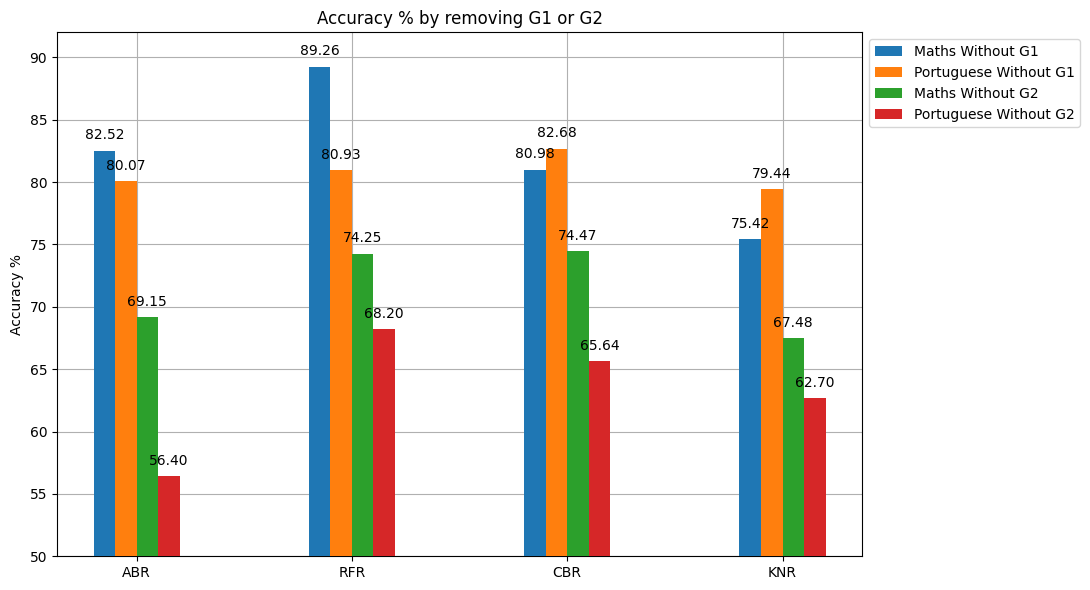

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Bar graph
labels = ['ABR', 'RFR', 'CBR', 'KNR']
Maths_woG1 = [df_data6.iloc[0, 1], df_data6.iloc[0, 2], df_data6.iloc[0, 3], df_data6.iloc[0, 4]]
Portuguese_woG1 = [df_data6.iloc[0, 5], df_data6.iloc[0, 6], df_data6.iloc[0, 7], df_data6.iloc[0, 8]]
Maths_woG2 = [df_data6.iloc[1, 1], df_data6.iloc[1, 2], df_data6.iloc[1, 3], df_data6.iloc[1, 4]]
Portuguese_woG2 = [df_data6.iloc[1, 5], df_data6.iloc[1, 6], df_data6.iloc[1, 7], df_data6.iloc[1, 8]]

x = range(len(labels))
width = 0.1

fig, ax = plt.subplots(figsize=(11, 6))
bars1 = ax.bar(x, Maths_woG1, width, label='Maths Without G1', zorder=3)
bars2 = ax.bar([i + width for i in x], Portuguese_woG1, width, label='Portuguese Without G1', zorder=3)
bars3 = ax.bar([i + width * 2 for i in x], Maths_woG2, width, label='Maths Without G2', zorder=3)
bars4 = ax.bar([i + width * 3 for i in x], Portuguese_woG2, width, label='Portuguese Without G2', zorder=3)

ax.set_ylabel('Accuracy %')
ax.set_title('Accuracy % by removing G1 or G2')
ax.set_xticks([i + width * 1.5 for i in x])
ax.set_xticklabels(labels, fontsize=10)
ax.set_ylim([50, 92])  # Set the minimum value of y axis to 50
ax.legend(loc='upper right')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 6),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

# Adding the rectangle box indicator of metrics and color
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


# <h1> Binary classification of Maths dataset </h2>

## <h3> Importing datasets from CSV files and cleaning them </h3>

In [ ]:
# Remove rows with missing values
df_clean_data = df_data.dropna(axis=0)
print(df_clean_data.shape)

(395, 33)


In [ ]:
# Remove duplicate rows
df_clean_data = df_clean_data.drop_duplicates()
print(df_clean_data.shape)

(395, 33)


In [ ]:
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,F
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,P
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,F
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,P


## <h4><b> To convert object columns to numeric </b></h4>

In [ ]:
# Function to convert object columns to numeric
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping


In [ ]:
convert_object_to_numeric(df_clean_data)
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,5,5,4,4,5,4,11,9,9,0
391,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,3,14,16,1
392,1,1,21,1,0,1,1,1,2,1,...,5,5,3,3,3,3,3,10,8,0
393,1,1,18,1,1,1,3,2,3,1,...,4,4,1,3,4,5,0,11,12,1


## <h4><b> X contains all columns except G3 and Y contains G3 column elements </b></h4>

In [ ]:
X = df_clean_data.drop(columns=['G3'],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,4,6,10


In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,0,1,1,3,1,3,2,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,1,0,1,1,1,2,1,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,1,1,1,3,2,3,1,...,0,4,4,1,3,4,5,0,11,12


In [ ]:
Y = df_clean_data['G3']
print(Y)

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64


## <h4><b> Separating Dataset into Training and Test </b></h4>

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Training : 80% and Testing : 20%
X_train.shape, X_test.shape

((316, 32), (79, 32))

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
181,0,1,16,0,0,1,3,3,3,1,...,1,4,2,3,1,2,3,2,12,13
194,0,1,16,0,0,1,2,3,2,1,...,0,5,3,3,1,1,3,0,13,14
173,0,0,16,0,0,1,1,3,0,2,...,1,4,3,5,1,1,3,0,8,7
63,0,0,16,0,0,1,4,3,4,3,...,0,3,4,4,2,4,4,2,10,9
253,0,1,16,1,0,1,2,1,2,1,...,0,3,3,2,1,3,3,0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,15,0,0,1,4,2,2,1,...,0,3,3,3,1,1,3,0,10,10
106,0,0,15,0,0,1,2,2,2,1,...,0,5,1,2,1,1,3,8,7,8
270,0,0,19,0,0,1,3,3,2,2,...,0,4,3,5,3,3,5,15,9,9
348,0,0,17,0,0,1,4,3,1,1,...,1,4,4,3,1,3,4,0,13,15


## <h4><b> Applying Random Forest Classifier to perform feature extraction and visualize top features in the dataset </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features based on importance
#top_15_features = feature_importance_df['Feature'].head(15)
top_15_features = feature_importance_df['Feature'].head(15)

# Filter training and testing data to use only the top 15 features
X_test1 = X_test #Without top 15 fs
X_train1 = X_train #Without top 15 fs

X_train = X_train[top_15_features]
X_test = X_test[top_15_features]

In [ ]:
X_train

,G2,G1,absences,failures,goout,age,health,Fedu,Fjob,Walc,freetime,Mjob,reason,Medu,famrel
181,13,12,2,0,3,16,3,3,1,2,2,3,2,3,4
194,14,13,0,0,3,16,3,3,1,1,3,2,2,2,5
173,7,8,0,3,5,16,3,3,2,1,3,0,2,1,4
63,9,10,2,0,4,16,4,3,3,4,4,4,2,4,3
253,9,8,0,0,2,16,3,1,1,3,3,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,10,10,0,0,3,15,3,2,1,1,3,2,0,4,3
106,8,7,8,0,2,15,3,2,1,1,1,2,0,2,5
270,9,9,15,2,5,19,5,3,2,3,3,2,2,3,4
348,15,13,0,0,3,17,4,3,1,3,4,1,3,4,4


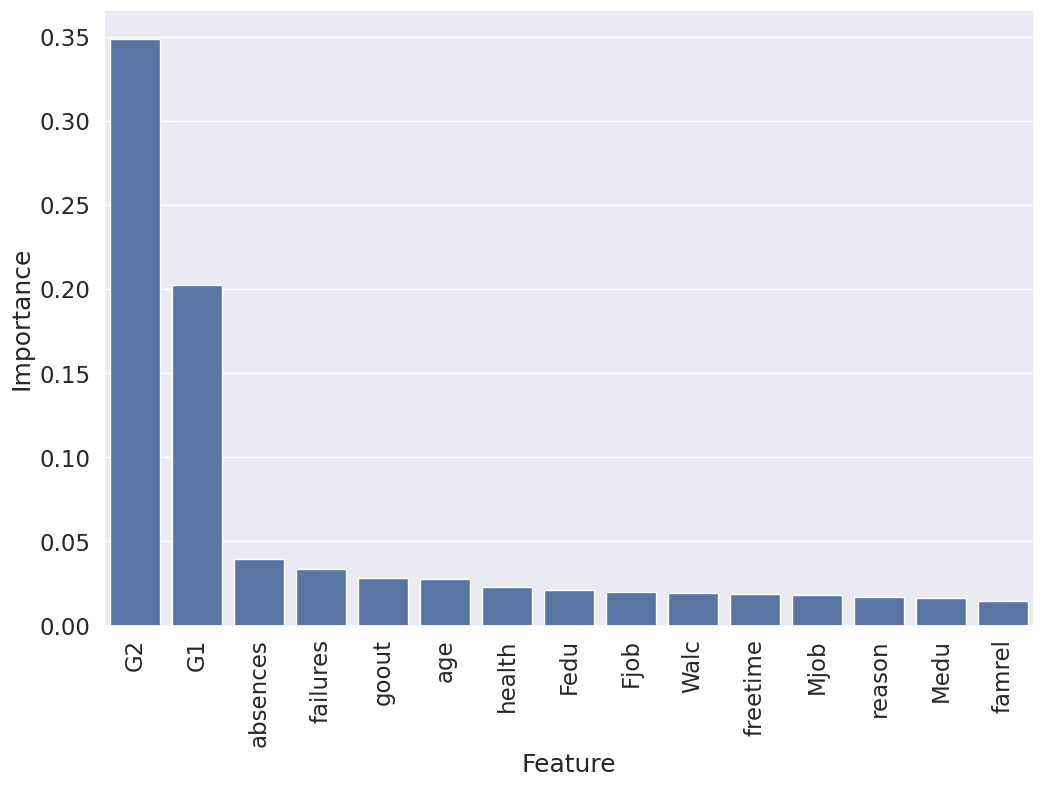

In [ ]:
# Set the style of the plot to have a white background
sns.set_style('white')

# Set global font size for the plot
sns.set(font_scale=1.5)  # Increase the font size of labels and title
plt.rcParams.update({'font.size': 14})  # Increase the font size of tick labels

# Plot a bar graph with feature names displayed vertically
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data = feature_importance_df.head(15))

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
#plt.title('Top 15 Features and their Importance Scores')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Save the plot with a white background at high resolution (DPI) and as an image file
#plt.savefig('top_15_features_importance.png', dpi=300, facecolor='white')

# Display the plot
plt.show()


In [ ]:
X_train.shape, X_test.shape

((316, 15), (79, 15))

## <h4><b> Model evaluation and comparison chart of each regressor </b></h4>

In [ ]:
# Function defn for model evaluation parameters
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
X_test

,G2,G1,absences,failures,goout,age,health,Fedu,Fjob,Walc,freetime,Mjob,reason,Medu,famrel
78,8,8,2,3,1,17,3,1,1,1,5,2,2,2,4
371,12,14,3,0,3,18,3,2,2,3,3,0,1,1,4
248,5,3,8,1,3,18,5,3,2,3,3,2,0,3,4
55,9,8,8,0,4,16,2,1,1,1,3,2,1,2,5
390,9,9,11,2,4,20,4,2,2,5,5,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,11,12,0,0,2,17,3,2,2,2,2,2,0,1,3
82,6,7,10,0,4,15,5,2,1,1,4,3,3,3,4
114,9,9,8,0,2,15,5,1,2,1,4,1,3,2,5
3,14,15,2,0,2,15,5,2,2,1,2,1,2,4,3


In [ ]:
#Comparing the performance of each of these models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3075
- Mean Absolute Error: 0.2654
- R2 Score: 0.5696
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3175
- Mean Absolute Error: 0.2668
- R2 Score: 0.5520


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4198
- Mean Absolute Error: 0.3908
- R2 Score: 0.1979
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4240
- Mean Absolute Error: 0.3921
- R2 Score: 0.2010


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3075
- Mean Absolute Error: 0.2654
- R2 Score: 0.5696
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3175
- Mean Absolute Error: 0.2669
- R2 Score: 0.5520


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2344
- Mean Absolute Error: 0.1253
- R2 Score: 0.7500
-----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.713972
7,CatBoosting Regressor,0.661375
5,Random Forest Regressor,0.642007
3,K-Neighbors Regressor,0.617379
6,XGBRegressor,0.568899
2,Ridge,0.551995
0,Linear Regression,0.551956
4,Decision Tree,0.437322
1,Lasso,0.201012


## <h4><b> Calculating Accuracy of our model </b></h4>

In [ ]:
from sklearn.metrics import r2_score

# Train the AdaBoost Regressor model
ada_boost_regressor = AdaBoostRegressor()
ada_boost_regressor.fit(X_train, Y_train)

# Make predictions
Y_test_pred = ada_boost_regressor.predict(X_test)

# Calculate R-squared score
test_r2 = r2_score(Y_test, Y_test_pred)

print("AdaBoost Regressor Model Performance:")
print("Test R-squared: {:.2f}".format(test_r2 * 100))

AdaBoost Regressor Model Performance:
Test R-squared: 67.37


## <h4><b> Scatter plot for actual vs predicted </b></h4>

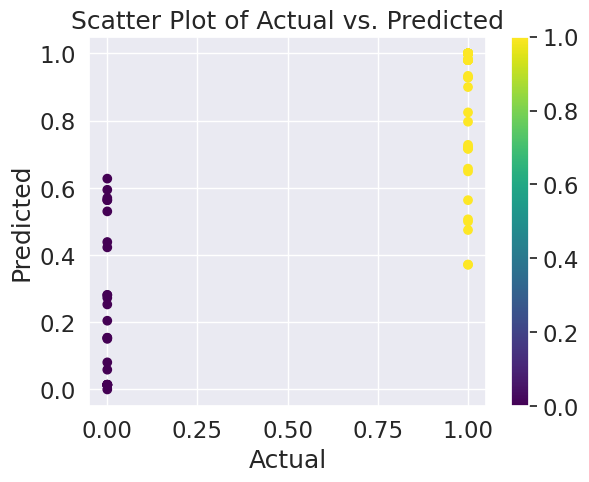

In [ ]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_test_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

## <h4><b> Confusion Matrix </b></h4>

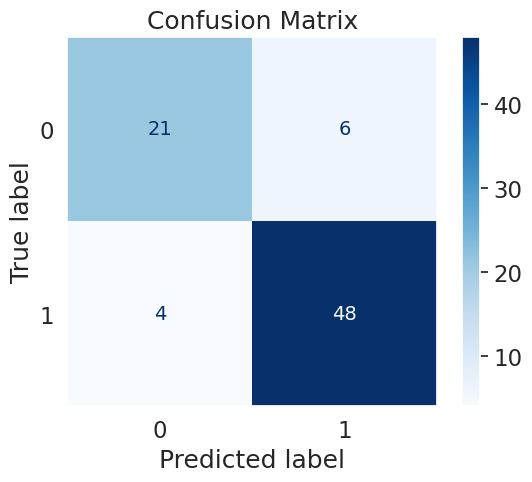

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have Y_test and Y_pred as your actual and predicted values

# Convert Y_pred to class labels
Y_pred_class = [round(pred) for pred in Y_test_pred]

# Calculate the confusion matrix
cmatrix = confusion_matrix(Y_test, Y_pred_class)

# Create the confusion matrix plot
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')  # Change the color scheme
disp.ax_.grid(False)  # Remove the grid

ax.set_title('Confusion Matrix')

# Show the confusion matrix
plt.show()


## <h4> Saving our model as a pickle file </h4>

In [ ]:
"""
# Import necessary libraries
import pickle

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/SIT_Hackathon/Models/Binary_Maths_adaboost_wofs.pkl'  # Adjust the path as needed

# Save the model to the specified file in Google Drive with write permission
try:
    with open(file_path, 'wb') as files:
        pickle.dump(ada_boost_regressor, files)
    print("Model saved successfully in Google Drive!")
except Exception as e:
    print(f"Failed to save model: {e}")

# Load the saved model from the specified file in Google Drive
try:
    with open(file_path, 'rb') as f:
        lr = pickle.load(f)
    print("Model loaded successfully from Google Drive!")
except Exception as e:
    print(f"Failed to load model: {e}")
"""

Model saved successfully in Google Drive!
Model loaded successfully from Google Drive!


## Generating Bar graphs for with and without using feature selection

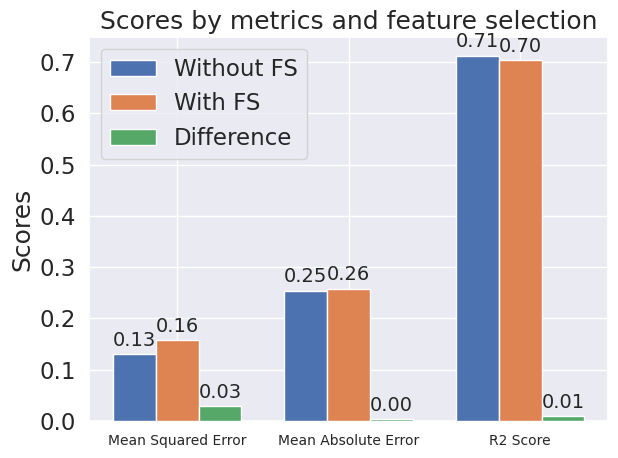

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the model with feature selection
model_with_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/Binary_Maths_adaboost.pkl")

# Train the model without feature selection
model_without_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/Binary_Maths_adaboost_wofs.pkl")

# Make predictions
Y_test_pred_with_fs = model_with_fs.predict(X_test)
Y_test_pred_without_fs = model_without_fs.predict(X_test1)

mse_with_fs, mae_with_fs, r2_with_fs = evaluate_model(Y_test, Y_test_pred_with_fs)
mse_without_fs, mae_without_fs, r2_without_fs = evaluate_model(Y_test, Y_test_pred_without_fs)

# Calculate the differences
diff_mse = - mse_without_fs + mse_with_fs
diff_mae = - mae_without_fs + mae_with_fs
diff_r2 =  r2_without_fs - r2_with_fs

# Bar graph
labels = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']
without_fs = [mse_without_fs, mae_without_fs, r2_without_fs]
with_fs = [mse_with_fs, mae_with_fs, r2_with_fs]
diff = [diff_mse, diff_mae, diff_r2]

x = range(len(labels))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, without_fs, width, label='Without FS', zorder=3)
bars2 = ax.bar([i + width for i in x], with_fs, width, label='With FS', zorder=3)
bars3 = ax.bar([i + width*2 for i in x], diff, width, label='Difference', zorder=3)

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and feature selection')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels, fontsize=10)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


## Generating results : f1 score , recall , precision , ROC - AUC

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve

# Calculate F1 score, precision, and recall
f1 = f1_score(Y_test, np.round(Y_test_pred))
precision = precision_score(Y_test, np.round(Y_test_pred))
recall = recall_score(Y_test, np.round(Y_test_pred))

# Plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_test_pred)

plt.figure(figsize=(12, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Plot Metrics
plt.subplot(1, 2, 2)
metrics = [test_r2, f1, precision, recall]
labels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(metrics))
bars = plt.bar(x, metrics, color='blue')
plt.xticks(x, labels, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Attach numeric values to the bars
for bar, metric in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.01, '%.2f' % metric, ha='center', va='bottom')

plt.tight_layout()
plt.show()
"""

"\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve\n\n# Calculate F1 score, precision, and recall\nf1 = f1_score(Y_test, np.round(Y_test_pred))\nprecision = precision_score(Y_test, np.round(Y_test_pred))\nrecall = recall_score(Y_test, np.round(Y_test_pred))\n\n# Plotting precision-recall curve\nprecision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_test_pred)\n\nplt.figure(figsize=(12, 6))\n\n# Plot Precision-Recall Curve\nplt.subplot(1, 2, 1)\nplt.plot(recall_curve, precision_curve, marker='.')\nplt.title('Precision-Recall Curve')\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.grid(True)\n\n# Plot Metrics\nplt.subplot(1, 2, 2)\nmetrics = [test_r2, f1, precision, recall]\nlabels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall']\nx = np.arange(len(metrics))\nbars = plt.bar(x, metrics, color='blue')\nplt.xticks(x, labels, rotation=45)\nplt.title('Model Perfor

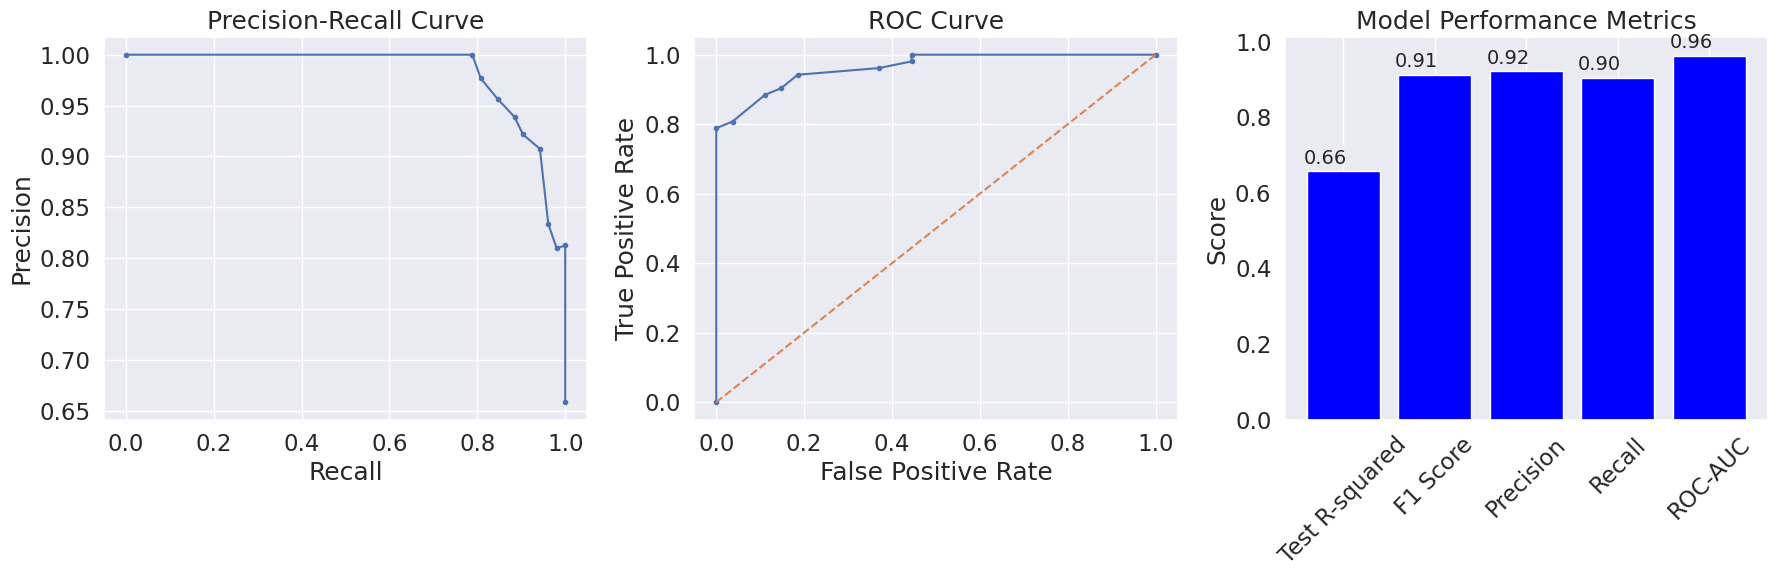

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve

# Calculate F1 score, precision, and recall
f1 = f1_score(Y_test, np.round(Y_test_pred))
precision = precision_score(Y_test, np.round(Y_test_pred))
recall = recall_score(Y_test, np.round(Y_test_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_test_pred)

# Plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_test_pred)

plt.figure(figsize=(18, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Plot Metrics
plt.subplot(1, 3, 3)
metrics = [test_r2, f1, precision, recall, roc_auc]
labels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
x = np.arange(len(metrics))
bars = plt.bar(x, metrics, color='blue')
plt.xticks(x, labels, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Attach numeric values to the bars
for bar, metric in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, '%.2f' % metric, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# <h1> Binary classification of Portuguese dataset </h2>

## <h3> Importing datasets from CSV files and cleaning them </h3>

In [ ]:
# Remove rows with missing values
df_clean_data = df_data1.dropna(axis=0)
print(df_clean_data.shape)

(649, 33)


In [ ]:
# Remove duplicate rows
df_clean_data = df_clean_data.drop_duplicates()
print(df_clean_data.shape)

(649, 33)


In [ ]:
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,P
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,P
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,P
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,F
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,P


## <h4><b> To convert object columns to numeric </b></h4>

In [ ]:
# Function to convert object columns to numeric
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping


In [ ]:
convert_object_to_numeric(df_clean_data)
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,4,0,11,0
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,2,9,11,0
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,6,12,13,0
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,0,14,14,0
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,0,11,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,5,4,2,1,2,5,4,10,11,0
645,1,0,18,0,1,1,3,1,4,2,...,4,3,4,1,1,1,4,15,15,0
646,1,0,18,0,0,1,1,1,2,1,...,1,1,1,1,1,5,6,11,12,1
647,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,6,10,10,0


## <h4><b> X contains all columns except G3 and Y contains G3 column elements </b></h4>

In [ ]:
X = df_clean_data.drop(columns=['G3'],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,0,11,13


In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,0,5,4,2,1,2,5,4,10,11
645,1,0,18,0,1,1,3,1,4,2,...,0,4,3,4,1,1,1,4,15,15
646,1,0,18,0,0,1,1,1,2,1,...,0,1,1,1,1,1,5,6,11,12
647,1,1,17,0,1,1,3,1,3,2,...,0,2,4,5,3,4,2,6,10,10


In [ ]:
Y = df_clean_data['G3']
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
644    0
645    0
646    1
647    0
648    0
Name: G3, Length: 649, dtype: int64


## <h4><b> Separating Dataset into Training and Test </b></h4>

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Training : 80% and Testing : 20%
X_train.shape, X_test.shape

((519, 32), (130, 32))

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
332,0,0,18,0,0,1,2,2,0,4,...,0,4,3,3,1,2,2,0,18,18
29,0,1,16,0,0,1,4,4,4,0,...,1,4,4,5,5,5,5,4,12,11
302,0,1,18,1,0,1,3,2,2,1,...,0,5,3,2,1,1,3,2,10,11
286,0,1,17,1,0,1,2,1,2,1,...,0,4,4,2,2,4,5,0,12,12
554,1,0,17,1,0,1,1,1,0,4,...,1,3,5,5,2,2,4,3,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,15,0,0,1,4,2,2,1,...,0,3,3,3,1,1,3,0,11,9
106,0,0,15,0,0,1,2,2,2,1,...,0,5,1,2,1,1,3,4,10,10
270,0,1,16,0,0,1,4,4,3,2,...,0,5,3,2,1,2,5,4,14,15
435,1,0,15,1,1,1,1,1,0,2,...,0,5,4,3,1,2,4,0,10,10


## <h4><b> Applying Random Forest Classifier to perform feature extraction and visualize top features in the dataset </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features based on importance
#top_15_features = feature_importance_df['Feature'].head(15)
top_15_features = feature_importance_df['Feature'].head(15)

# Filter training and testing data to use only the top 15 features
X_test1 = X_test #Without top 15 fs
X_train1 = X_train #Without top 15 fs

X_train = X_train[top_15_features]
X_test = X_test[top_15_features]

In [ ]:
X_train

,G2,G1,failures,school,famrel,absences,age,health,freetime,Walc,reason,goout,Dalc,Fedu,higher
332,18,18,0,0,4,0,18,2,3,2,1,3,1,2,0
29,11,12,0,0,4,4,16,5,4,5,2,5,5,4,0
302,11,10,0,0,5,2,18,3,3,1,0,2,1,2,0
286,12,12,0,0,4,0,17,5,4,4,0,2,2,1,0
554,11,10,0,1,3,3,17,4,5,2,0,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9,11,0,0,3,0,15,3,3,1,0,3,1,2,0
106,10,10,0,0,5,4,15,3,1,1,0,2,1,2,0
270,15,14,0,0,5,4,16,5,3,2,0,2,1,4,0
435,10,10,0,1,5,0,15,4,4,2,3,3,1,1,0


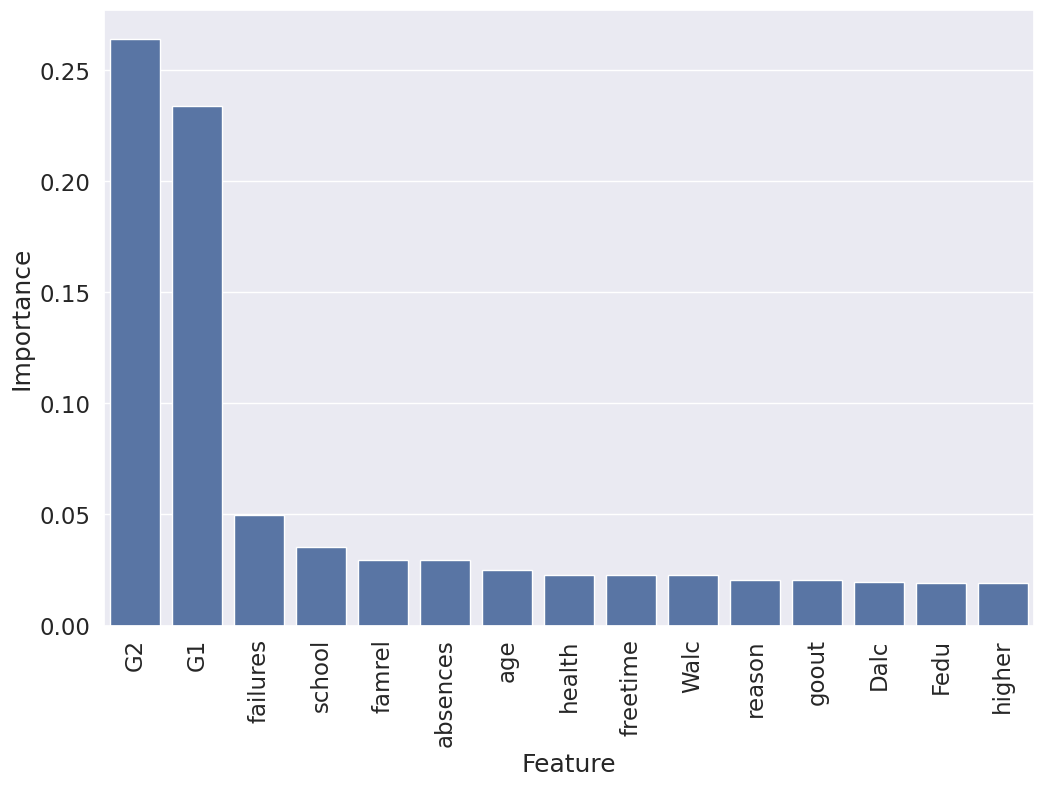

In [ ]:
# Set the style of the plot to have a white background
sns.set_style('white')

# Set global font size for the plot
sns.set(font_scale=1.5)  # Increase the font size of labels and title
plt.rcParams.update({'font.size': 14})  # Increase the font size of tick labels

# Plot a bar graph with feature names displayed vertically
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data = feature_importance_df.head(15))

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
#plt.title('Top 15 Features and their Importance Scores')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Save the plot with a white background at high resolution (DPI) and as an image file
#plt.savefig('top_15_features_importance.png', dpi=300, facecolor='white')

# Display the plot
plt.show()


In [ ]:
X_train.shape, X_test.shape

((519, 15), (130, 15))

## <h4><b> Model evaluation and comparison chart of each regressor </b></h4>

In [ ]:
# Function defn for model evaluation parameters
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
X_test

,G2,G1,failures,school,famrel,absences,age,health,freetime,Walc,reason,goout,Dalc,Fedu,higher
636,18,17,0,1,3,4,18,2,2,4,2,4,1,4,0
220,11,11,0,0,2,2,16,4,3,2,0,3,2,1,0
594,18,18,0,1,4,0,18,1,3,2,3,5,1,4,0
429,11,10,0,1,5,5,16,2,3,3,2,2,1,4,0
72,11,13,0,0,3,2,15,5,3,4,3,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,6,7,0,1,3,2,16,3,1,4,0,3,1,2,0
374,18,17,0,0,3,0,17,5,4,3,0,3,2,1,0
444,10,9,0,1,3,4,16,5,4,2,1,5,1,4,0
244,12,14,0,0,3,0,17,3,2,2,3,3,1,3,0


In [ ]:
#Comparing the performance of each of these models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.2161
- R2 Score: 0.4297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2747
- Mean Absolute Error: 0.2109
- R2 Score: 0.2606


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3701
- Mean Absolute Error: 0.2739
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3231
- Mean Absolute Error: 0.2414
- R2 Score: -0.0229


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.2162
- R2 Score: 0.4297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2748
- Mean Absolute Error: 0.2111
- R2 Score: 0.2604


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2125
- Mean Absolute Error: 0.0940
- R2 Score: 0.6702
----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.528094
3,K-Neighbors Regressor,0.508638
7,CatBoosting Regressor,0.438954
5,Random Forest Regressor,0.435325
0,Linear Regression,0.260626
2,Ridge,0.260362
6,XGBRegressor,0.161379
4,Decision Tree,0.020290
1,Lasso,-0.022943


## <h4><b> Calculating Accuracy of our model </b></h4>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize the K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()

# Train the KNN regressor on the training data
knn_model.fit(X_train, Y_train)

# Make predictions
Y_pred = knn_model.predict(X_test)

# Calculate R2 score
score = r2_score(Y_test, Y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 50.86


## Generating Bar graphs for with and without using feature selection

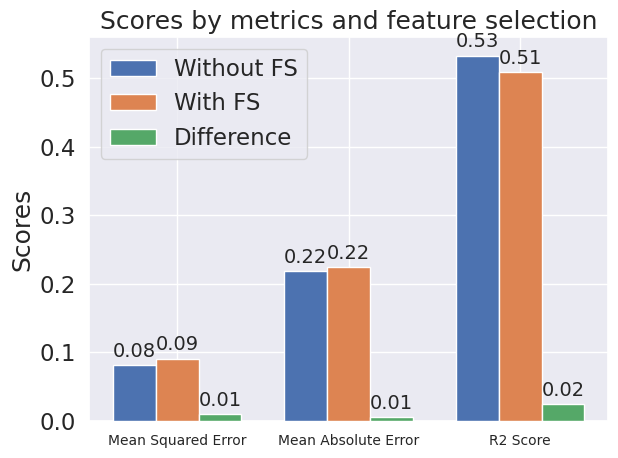

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the model with feature selection
model_with_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/Binary_Por_knn.pkl")

# Train the model without feature selection
model_without_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/Binary_Por_knn_wofs.pkl")

# Make predictions
Y_test_pred_with_fs = model_with_fs.predict(X_test)
Y_test_pred_without_fs = model_without_fs.predict(X_test1)

mse_with_fs, mae_with_fs, r2_with_fs = evaluate_model(Y_test, Y_test_pred_with_fs)
mse_without_fs, mae_without_fs, r2_without_fs = evaluate_model(Y_test, Y_test_pred_without_fs)

# Calculate the differences
diff_mse = - mse_without_fs + mse_with_fs
diff_mae = - mae_without_fs + mae_with_fs
diff_r2 =  r2_without_fs - r2_with_fs

# Bar graph
labels = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']
without_fs = [mse_without_fs, mae_without_fs, r2_without_fs]
with_fs = [mse_with_fs, mae_with_fs, r2_with_fs]
diff = [diff_mse, diff_mae, diff_r2]

x = range(len(labels))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, without_fs, width, label='Without FS', zorder=3)
bars2 = ax.bar([i + width for i in x], with_fs, width, label='With FS', zorder=3)
bars3 = ax.bar([i + width*2 for i in x], diff, width, label='Difference', zorder=3)

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and feature selection')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels, fontsize=10)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


## <h4><b> Scatter plot for actual vs predicted </b></h4>

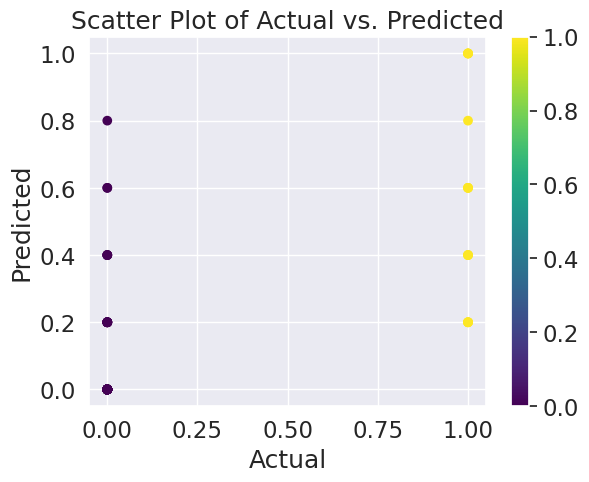

In [ ]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

## <h4><b> Confusion Matrix </b></h4>

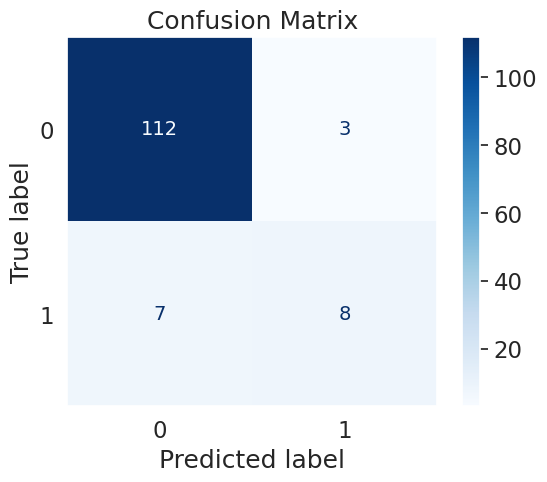

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have Y_test and Y_pred as your actual and predicted values

# Convert Y_pred to class labels
Y_pred_class = [round(pred) for pred in Y_pred]

# Calculate the confusion matrix
cmatrix = confusion_matrix(Y_test, Y_pred_class)

# Create the confusion matrix plot
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')  # Change the color scheme
disp.ax_.grid(False)  # Remove the grid

ax.set_title('Confusion Matrix')

# Show the confusion matrix
plt.show()


## <h4> Saving our model as a pickle file </h4>

In [ ]:
"""
# Import necessary libraries
import pickle

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/SIT_Hackathon/Models/Binary_Por_knn_wofs.pkl'  # Adjust the path as needed

# Save the model to the specified file in Google Drive with write permission
try:
    with open(file_path, 'wb') as files:
        pickle.dump(knn_model, files)
    print("Model saved successfully in Google Drive!")
except Exception as e:
    print(f"Failed to save model: {e}")

# Load the saved model from the specified file in Google Drive
try:
    with open(file_path, 'rb') as f:
        lr = pickle.load(f)
    print("Model loaded successfully from Google Drive!")
except Exception as e:
    print(f"Failed to load model: {e}")
"""

Model saved successfully in Google Drive!
Model loaded successfully from Google Drive!


## Generating results : f1 score , recall , precision , ROC - AUC

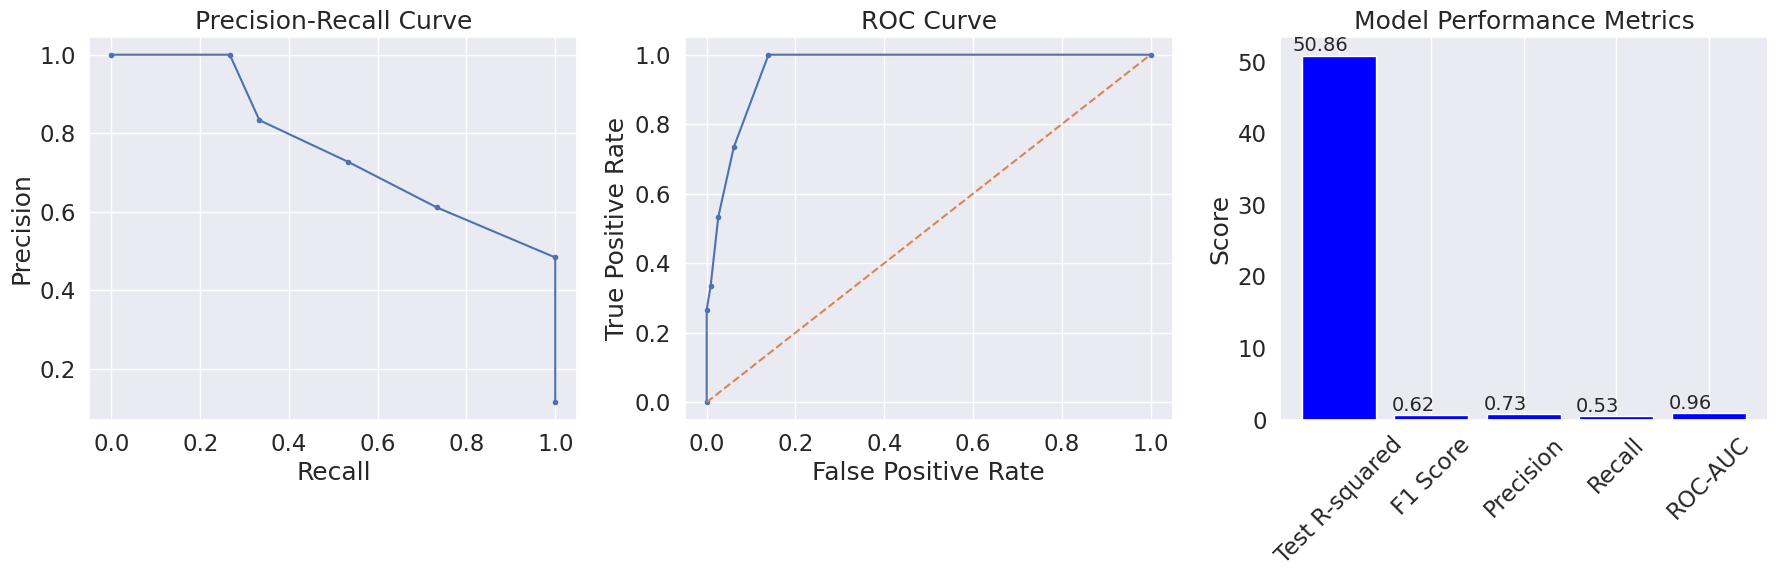

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve

# Calculate F1 score, precision, and recall
f1 = f1_score(Y_test, np.round(Y_pred))
precision = precision_score(Y_test, np.round(Y_pred))
recall = recall_score(Y_test, np.round(Y_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_pred)

# Plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_pred)

plt.figure(figsize=(18, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Plot Metrics
plt.subplot(1, 3, 3)
metrics = [score, f1, precision, recall, roc_auc]
labels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
x = np.arange(len(metrics))
bars = plt.bar(x, metrics, color='blue')
plt.xticks(x, labels, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Attach numeric values to the bars
for bar, metric in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, '%.2f' % metric, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# <h1> 5-class classification of maths dataset </h2>

## <h3> Importing datasets from CSV files and cleaning them </h3>

In [ ]:
# Remove rows with missing values
df_clean_data = df_data2.dropna(axis=0)
print(df_clean_data.shape)

(395, 33)


In [ ]:
# Remove duplicate rows
df_clean_data = df_clean_data.drop_duplicates()
print(df_clean_data.shape)

(395, 33)


In [ ]:
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,F
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,A
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,F
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,D


## <h4><b> To convert object columns to numeric </b></h4>

In [ ]:
# Function to convert object columns to numeric
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping


In [ ]:
convert_object_to_numeric(df_clean_data)
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,2
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,5,5,4,4,5,4,11,9,9,0
391,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,3,14,16,3
392,1,1,21,1,0,1,1,1,2,1,...,5,5,3,3,3,3,3,10,8,0
393,1,1,18,1,1,1,3,2,3,1,...,4,4,1,3,4,5,0,11,12,1


## <h4><b> X contains all columns except G3 and Y contains G3 column elements </b></h4>

In [ ]:
X = df_clean_data.drop(columns=['G3'],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,4,6,10


In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,0,1,1,3,1,3,2,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,1,0,1,1,1,2,1,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,1,1,1,3,2,3,1,...,0,4,4,1,3,4,5,0,11,12


In [ ]:
Y = df_clean_data['G3']
print(Y)

0      0
1      0
2      1
3      2
4      1
      ..
390    0
391    3
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64


## <h4><b> Separating Dataset into Training and Test </b></h4>

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Training : 80% and Testing : 20%
X_train.shape, X_test.shape

((316, 32), (79, 32))

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
181,0,1,16,0,0,1,3,3,3,1,...,1,4,2,3,1,2,3,2,12,13
194,0,1,16,0,0,1,2,3,2,1,...,0,5,3,3,1,1,3,0,13,14
173,0,0,16,0,0,1,1,3,0,2,...,1,4,3,5,1,1,3,0,8,7
63,0,0,16,0,0,1,4,3,4,3,...,0,3,4,4,2,4,4,2,10,9
253,0,1,16,1,0,1,2,1,2,1,...,0,3,3,2,1,3,3,0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,15,0,0,1,4,2,2,1,...,0,3,3,3,1,1,3,0,10,10
106,0,0,15,0,0,1,2,2,2,1,...,0,5,1,2,1,1,3,8,7,8
270,0,0,19,0,0,1,3,3,2,2,...,0,4,3,5,3,3,5,15,9,9
348,0,0,17,0,0,1,4,3,1,1,...,1,4,4,3,1,3,4,0,13,15


## <h4><b> Applying Random Forest Classifier to perform feature extraction and visualize top features in the dataset </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features based on importance
#top_15_features = feature_importance_df['Feature'].head(15)
top_15_features = feature_importance_df['Feature'].head(15)

# Filter training and testing data to use only the top 15 features
X_test1 = X_test #Without top 15 fs
X_train1 = X_train #Without top 15 fs

X_train = X_train[top_15_features]
X_test = X_test[top_15_features]

In [ ]:
X_train

,G2,G1,absences,age,health,Walc,Fedu,goout,freetime,Medu,Mjob,Fjob,reason,studytime,famrel
181,13,12,2,16,3,2,3,3,2,3,3,1,2,2,4
194,14,13,0,16,3,1,3,3,3,2,2,1,2,1,5
173,7,8,0,16,3,1,3,5,3,1,0,2,2,2,4
63,9,10,2,16,4,4,3,4,4,4,4,3,2,3,3
253,9,8,0,16,3,3,1,2,3,2,2,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,10,10,0,15,3,1,2,3,3,4,2,1,0,4,3
106,8,7,8,15,3,1,2,2,1,2,2,1,0,4,5
270,9,9,15,19,5,3,3,5,3,3,2,2,2,2,4
348,15,13,0,17,4,3,3,3,4,4,1,1,3,3,4


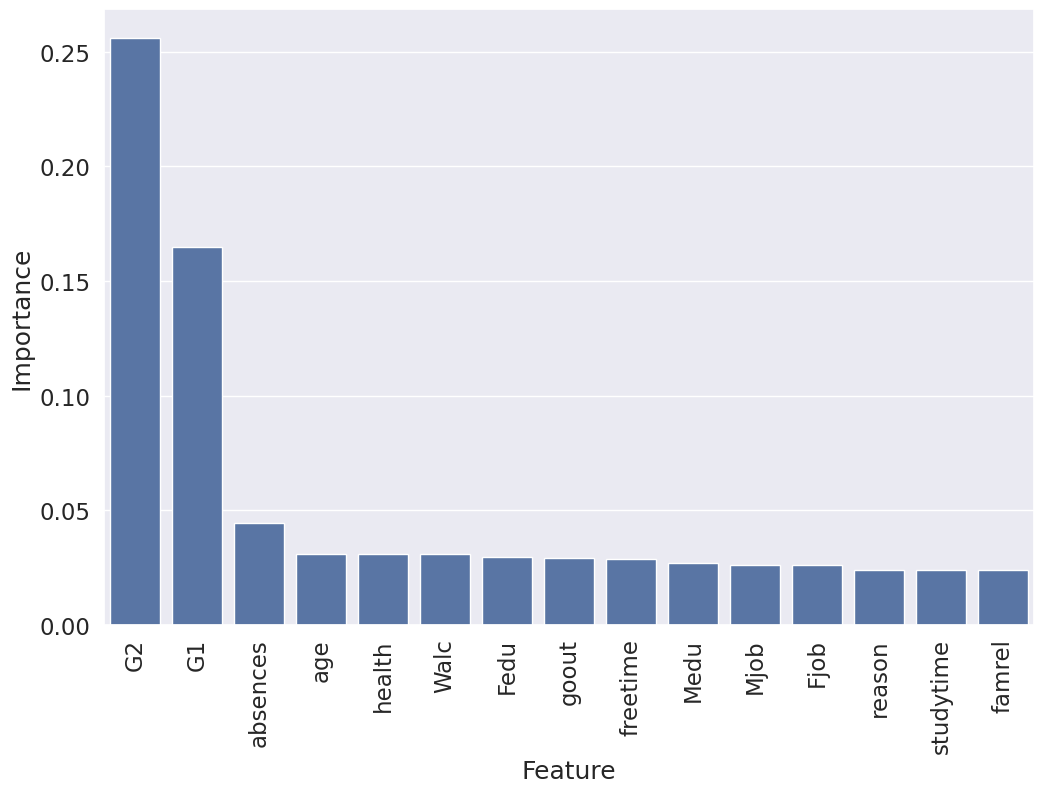

In [ ]:
# Set the style of the plot to have a white background
sns.set_style('white')

# Set global font size for the plot
sns.set(font_scale=1.5)  # Increase the font size of labels and title
plt.rcParams.update({'font.size': 14})  # Increase the font size of tick labels

# Plot a bar graph with feature names displayed vertically
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data = feature_importance_df.head(15))

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
#plt.title('Top 15 Features and their Importance Scores')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Save the plot with a white background at high resolution (DPI) and as an image file
#plt.savefig('top_15_features_importance.png', dpi=300, facecolor='white')

# Display the plot
plt.show()


In [ ]:
X_train.shape, X_test.shape

((316, 15), (79, 15))

## <h4><b> Model evaluation and comparison chart of each regressor </b></h4>

In [ ]:
# Function defn for model evaluation parameters
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
X_test

,G2,G1,absences,age,health,Walc,Fedu,goout,freetime,Medu,Mjob,Fjob,reason,studytime,famrel
78,8,8,2,17,3,1,1,1,5,2,2,1,2,1,4
371,12,14,3,18,3,3,2,3,3,1,0,2,1,1,4
248,5,3,8,18,5,3,3,3,3,3,2,2,0,2,4
55,9,8,8,16,2,1,1,4,3,2,2,1,1,2,5
390,9,9,11,20,4,5,2,4,5,2,3,2,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,11,12,0,17,3,2,2,2,2,1,2,2,0,2,3
82,6,7,10,15,5,1,2,4,4,3,3,1,3,2,4
114,9,9,8,15,5,1,1,2,4,2,1,2,3,2,5
3,14,15,2,15,5,1,2,2,2,4,1,2,2,3,3


In [ ]:
#Comparing the performance of each of these models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.9745
- Mean Absolute Error: 0.7334
- R2 Score: 0.5432
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9842
- Mean Absolute Error: 0.7465
- R2 Score: 0.5023


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0453
- Mean Absolute Error: 0.7846
- R2 Score: 0.4745
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9670
- Mean Absolute Error: 0.7079
- R2 Score: 0.5195


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.9745
- Mean Absolute Error: 0.7334
- R2 Score: 0.5432
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9839
- Mean Absolute Error: 0.7463
- R2 Score: 0.5026


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8235
- Mean Absolute Error: 0.5911
- R2 Score: 0.6738
-----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.675406
8,AdaBoost Regressor,0.663572
5,Random Forest Regressor,0.639915
6,XGBRegressor,0.634378
3,K-Neighbors Regressor,0.532218
1,Lasso,0.519530
2,Ridge,0.502558
0,Linear Regression,0.502324
4,Decision Tree,0.440639


## <h4><b> Calculating Accuracy of our model </b></h4>

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=False)

# Train the CatBoost regressor on the training data
catboost_model.fit(X_train, Y_train)

# Make predictions
Y_pred = catboost_model.predict(X_test)

# Calculate R2 score
score = r2_score(Y_test, Y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 67.54


## <h4><b> Scatter plot for actual vs predicted </b></h4>

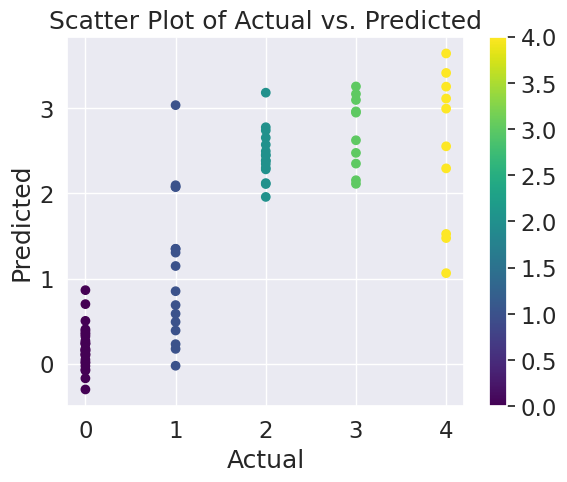

In [ ]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

## <h4><b> Confusion Matrix </b></h4>

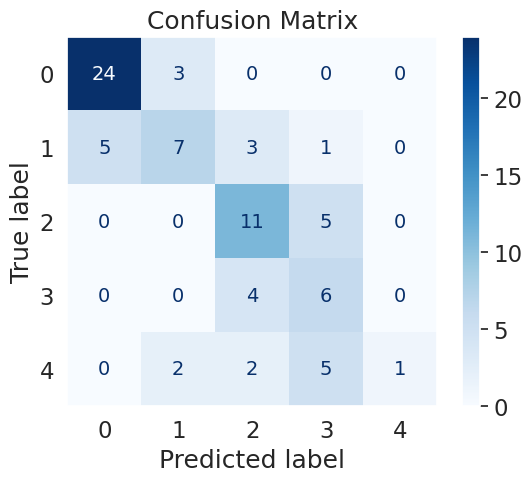

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have Y_test and Y_pred as your actual and predicted values

# Convert Y_pred to class labels
Y_pred_class = [round(pred) for pred in Y_pred]

# Calculate the confusion matrix
cmatrix = confusion_matrix(Y_test, Y_pred_class)

# Create the confusion matrix plot
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')  # Change the color scheme
disp.ax_.grid(False)  # Remove the grid

ax.set_title('Confusion Matrix')

# Show the confusion matrix
plt.show()


## <h4> Saving our model as a pickle file </h4>

In [ ]:
"""
# Import necessary libraries
import pickle

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/SIT_Hackathon/Models/5class_mat_cbr_wofs.pkl'  # Adjust the path as needed

# Save the model to the specified file in Google Drive with write permission
try:
    with open(file_path, 'wb') as files:
        pickle.dump(catboost_model, files)
    print("Model saved successfully in Google Drive!")
except Exception as e:
    print(f"Failed to save model: {e}")

# Load the saved model from the specified file in Google Drive
try:
    with open(file_path, 'rb') as f:
        lr = pickle.load(f)
    print("Model loaded successfully from Google Drive!")
except Exception as e:
    print(f"Failed to load model: {e}")
  """

Model saved successfully in Google Drive!
Model loaded successfully from Google Drive!


## Generating Bar graphs for with and without using feature selection

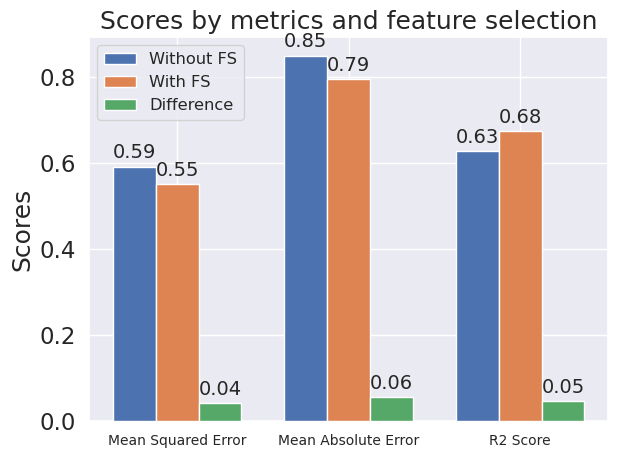

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the model with feature selection
model_with_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/5class_mat_cbr.pkl")

# Train the model without feature selection
model_without_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/5class_mat_cbr_wofs.pkl")

# Make predictions
Y_test_pred_with_fs = model_with_fs.predict(X_test)
Y_test_pred_without_fs = model_without_fs.predict(X_test1)

mse_with_fs, mae_with_fs, r2_with_fs = evaluate_model(Y_test, Y_test_pred_with_fs)
mse_without_fs, mae_without_fs, r2_without_fs = evaluate_model(Y_test, Y_test_pred_without_fs)

# Calculate the differences
diff_mse = mse_without_fs - mse_with_fs
diff_mae = mae_without_fs - mae_with_fs
diff_r2 = -r2_without_fs + r2_with_fs

# Bar graph
labels = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']
without_fs = [mse_without_fs, mae_without_fs, r2_without_fs]
with_fs = [mse_with_fs, mae_with_fs, r2_with_fs]
diff = [diff_mse, diff_mae, diff_r2]

x = range(len(labels))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, without_fs, width, label='Without FS', zorder=3)
bars2 = ax.bar([i + width for i in x], with_fs, width, label='With FS', zorder=3)
bars3 = ax.bar([i + width*2 for i in x], diff, width, label='Difference', zorder=3)

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and feature selection')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels, fontsize=10)

# Make legend smaller and move it to the left side
ax.legend(fontsize='small', loc='upper left')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


## Generating results : f1 score , recall , precision , ROC - AUC

# <h1> 5-class classification of Portuguese dataset </h2>

## <h3> Importing datasets from CSV files and cleaning them </h3>

In [ ]:
# Remove rows with missing values
df_clean_data = df_data3.dropna(axis=0)
print(df_clean_data.shape)

(649, 33)


In [ ]:
# Remove duplicate rows
df_clean_data = df_clean_data.drop_duplicates()
print(df_clean_data.shape)

(649, 33)


In [ ]:
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,D
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,A
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,F
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,D


## <h4><b> To convert object columns to numeric </b></h4>

In [ ]:
# Function to convert object columns to numeric
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping


In [ ]:
convert_object_to_numeric(df_clean_data)
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,4,0,11,0
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,2,9,11,0
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,0,14,14,2
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,5,4,2,1,2,5,4,10,11,0
645,1,0,18,0,1,1,3,1,4,2,...,4,3,4,1,1,1,4,15,15,3
646,1,0,18,0,0,1,1,1,2,1,...,1,1,1,1,1,5,6,11,12,4
647,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,6,10,10,0


## <h4><b> X contains all columns except G3 and Y contains G3 column elements </b></h4>

In [ ]:
X = df_clean_data.drop(columns=['G3'],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,0,11,13


In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,0,5,4,2,1,2,5,4,10,11
645,1,0,18,0,1,1,3,1,4,2,...,0,4,3,4,1,1,1,4,15,15
646,1,0,18,0,0,1,1,1,2,1,...,0,1,1,1,1,1,5,6,11,12
647,1,1,17,0,1,1,3,1,3,2,...,0,2,4,5,3,4,2,6,10,10


In [ ]:
Y = df_clean_data['G3']
print(Y)

0      0
1      0
2      1
3      2
4      1
      ..
644    0
645    3
646    4
647    0
648    0
Name: G3, Length: 649, dtype: int64


## <h4><b> Separating Dataset into Training and Test </b></h4>

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Training : 80% and Testing : 20%
X_train.shape, X_test.shape

((519, 32), (130, 32))

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
332,0,0,18,0,0,1,2,2,0,4,...,0,4,3,3,1,2,2,0,18,18
29,0,1,16,0,0,1,4,4,4,0,...,1,4,4,5,5,5,5,4,12,11
302,0,1,18,1,0,1,3,2,2,1,...,0,5,3,2,1,1,3,2,10,11
286,0,1,17,1,0,1,2,1,2,1,...,0,4,4,2,2,4,5,0,12,12
554,1,0,17,1,0,1,1,1,0,4,...,1,3,5,5,2,2,4,3,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,15,0,0,1,4,2,2,1,...,0,3,3,3,1,1,3,0,11,9
106,0,0,15,0,0,1,2,2,2,1,...,0,5,1,2,1,1,3,4,10,10
270,0,1,16,0,0,1,4,4,3,2,...,0,5,3,2,1,2,5,4,14,15
435,1,0,15,1,1,1,1,1,0,2,...,0,5,4,3,1,2,4,0,10,10


## <h4><b> Applying Random Forest Classifier to perform feature extraction and visualize top features in the dataset </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features based on importance
#top_15_features = feature_importance_df['Feature'].head(15)
top_15_features = feature_importance_df['Feature'].head(15)

# Filter training and testing data to use only the top 15 features
X_test1 = X_test #Without top 15 fs
X_train1 = X_train #Without top 15 fs

X_train = X_train[top_15_features]
X_test = X_test[top_15_features]

## Generating Bar graphs

In [ ]:
X_train

,G2,G1,absences,age,goout,health,freetime,Fedu,famrel,Medu,Walc,Mjob,studytime,reason,Fjob
332,18,18,0,18,3,2,3,2,4,2,2,0,3,1,4
29,11,12,4,16,5,5,4,4,4,4,5,4,2,2,0
302,11,10,2,18,2,3,3,2,5,3,1,2,3,0,1
286,12,12,0,17,2,5,4,1,4,2,4,2,1,0,1
554,11,10,3,17,5,4,5,1,3,1,2,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9,11,0,15,3,3,3,2,3,4,1,2,4,0,1
106,10,10,4,15,2,3,1,2,5,2,1,2,4,0,1
270,15,14,4,16,2,5,3,4,5,4,2,3,1,0,2
435,10,10,0,15,3,4,4,1,5,1,2,0,2,3,2


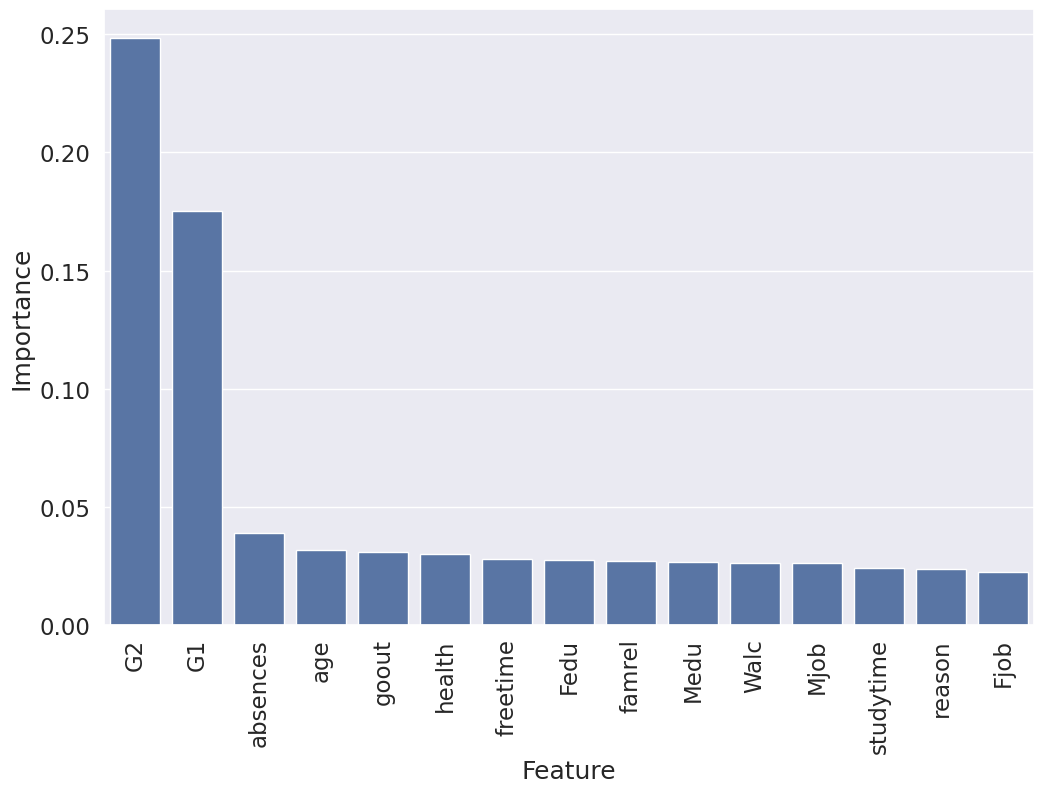

In [ ]:
# Set the style of the plot to have a white background
sns.set_style('white')

# Set global font size for the plot
sns.set(font_scale=1.5)  # Increase the font size of labels and title
plt.rcParams.update({'font.size': 14})  # Increase the font size of tick labels

# Plot a bar graph with feature names displayed vertically
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data = feature_importance_df.head(15))

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
#plt.title('Top 15 Features and their Importance Scores')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Save the plot with a white background at high resolution (DPI) and as an image file
#plt.savefig('top_15_features_importance.png', dpi=300, facecolor='white')

# Display the plot
plt.show()


In [ ]:
X_train.shape, X_test.shape

((519, 15), (130, 15))

## <h4><b> Model evaluation and comparison chart of each regressor </b></h4>

In [ ]:
# Function defn for model evaluation parameters
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
X_test

,G2,G1,absences,age,goout,health,freetime,Fedu,famrel,Medu,Walc,Mjob,studytime,reason,Fjob
636,18,17,4,18,4,2,2,4,3,4,4,4,2,2,0
220,11,11,2,16,3,4,3,1,2,3,2,3,2,0,1
594,18,18,0,18,5,1,3,4,4,4,2,4,2,3,0
429,11,10,5,16,2,2,3,4,5,4,3,0,2,2,1
72,11,13,2,15,4,5,3,1,3,1,4,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,6,7,2,16,3,3,1,2,3,3,4,3,1,0,4
374,18,17,0,17,3,5,4,1,3,3,3,3,3,0,2
444,10,9,4,16,5,5,4,4,3,3,2,2,2,1,3
244,12,14,0,17,3,3,2,3,3,4,2,1,2,3,1


In [ ]:
#Comparing the performance of each of these models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.4181
- Mean Absolute Error: 1.2149
- R2 Score: 0.0278
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4143
- Mean Absolute Error: 1.2353
- R2 Score: -0.0386


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.4382
- Mean Absolute Error: 1.2580
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3890
- Mean Absolute Error: 1.2313
- R2 Score: -0.0018


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.4181
- Mean Absolute Error: 1.2150
- R2 Score: 0.0278
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4142
- Mean Absolute Error: 1.2353
- R2 Score: -0.0384


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8952
- Mean Absolute Error: 0.6146
- R2 Score: 0.6126
--------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.463354
7,CatBoosting Regressor,0.452517
3,K-Neighbors Regressor,0.442121
8,AdaBoost Regressor,0.425456
6,XGBRegressor,0.381454
4,Decision Tree,0.017481
1,Lasso,-0.001797
2,Ridge,-0.038356
0,Linear Regression,-0.038559


## <h4><b> Calculating Accuracy of our model </b></h4>

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=False)

# Train the CatBoost regressor on the training data
catboost_model.fit(X_train, Y_train)

# Make predictions
Y_pred = catboost_model.predict(X_test)

# Calculate R2 score
score = r2_score(Y_test, Y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 45.25


## <h4><b> Scatter plot for actual vs predicted </b></h4>

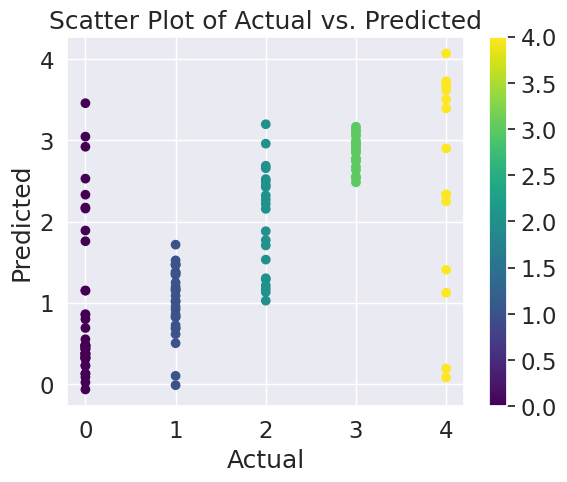

In [ ]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

## <h4><b> Confusion Matrix </b></h4>

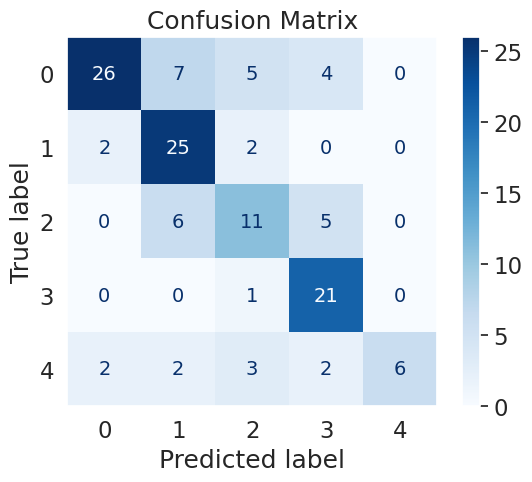

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have Y_test and Y_pred as your actual and predicted values

# Convert Y_pred to class labels
Y_pred_class = [round(pred) for pred in Y_pred]

# Calculate the confusion matrix
cmatrix = confusion_matrix(Y_test, Y_pred_class)

# Create the confusion matrix plot
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')  # Change the color scheme
disp.ax_.grid(False)  # Remove the grid

ax.set_title('Confusion Matrix')

# Show the confusion matrix
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <h4> Importing our model as a picke file </h4>

In [ ]:
"""
# Import necessary libraries
import pickle

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/SIT_Hackathon/Models/5class_Por_cbr_wofs.pkl'  # Adjust the path as needed

# Save the model to the specified file in Google Drive with write permission
try:
    with open(file_path, 'wb') as files:
        pickle.dump(catboost_model, files)
    print("Model saved successfully in Google Drive!")
except Exception as e:
    print(f"Failed to save model: {e}")

# Load the saved model from the specified file in Google Drive
try:
    with open(file_path, 'rb') as f:
        lr = pickle.load(f)
    print("Model loaded successfully from Google Drive!")
except Exception as e:
    print(f"Failed to load model: {e}")
"""

Model saved successfully in Google Drive!
Model loaded successfully from Google Drive!


## Generating Bar graphs for with and without using feature selection

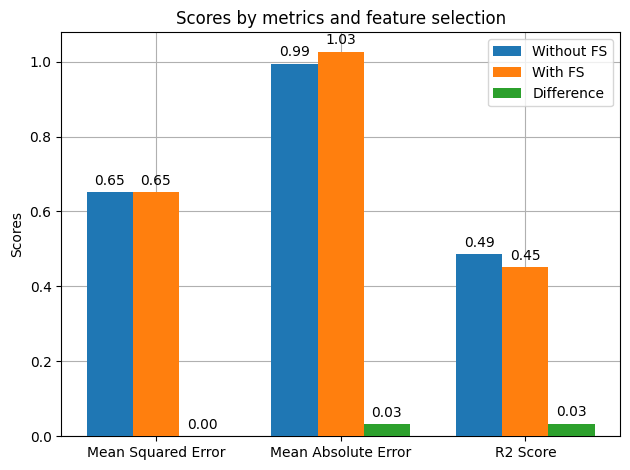

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the model with feature selection
model_with_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/5class_Por_cbr.pkl")

# Train the model without feature selection
model_without_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/5class_Por_cbr_wofs.pkl")

# Make predictions
Y_test_pred_with_fs = model_with_fs.predict(X_test)
Y_test_pred_without_fs = model_without_fs.predict(X_test1)

mse_with_fs, mae_with_fs, r2_with_fs = evaluate_model(Y_test, Y_test_pred_with_fs)
mse_without_fs, mae_without_fs, r2_without_fs = evaluate_model(Y_test, Y_test_pred_without_fs)

# Calculate the differences
diff_mse = - mse_without_fs + mse_with_fs
diff_mae = - mae_without_fs + mae_with_fs
diff_r2 =  r2_without_fs - r2_with_fs

# Bar graph
labels = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']
without_fs = [mse_without_fs, mae_without_fs, r2_without_fs]
with_fs = [mse_with_fs, mae_with_fs, r2_with_fs]
diff = [diff_mse, diff_mae, diff_r2]

x = range(len(labels))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, without_fs, width, label='Without FS', zorder=3)
bars2 = ax.bar([i + width for i in x], with_fs, width, label='With FS', zorder=3)
bars3 = ax.bar([i + width*2 for i in x], diff, width, label='Difference', zorder=3)

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and feature selection')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels, fontsize=10)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


## Generating results : f1 score , recall , precision , ROC - AUC

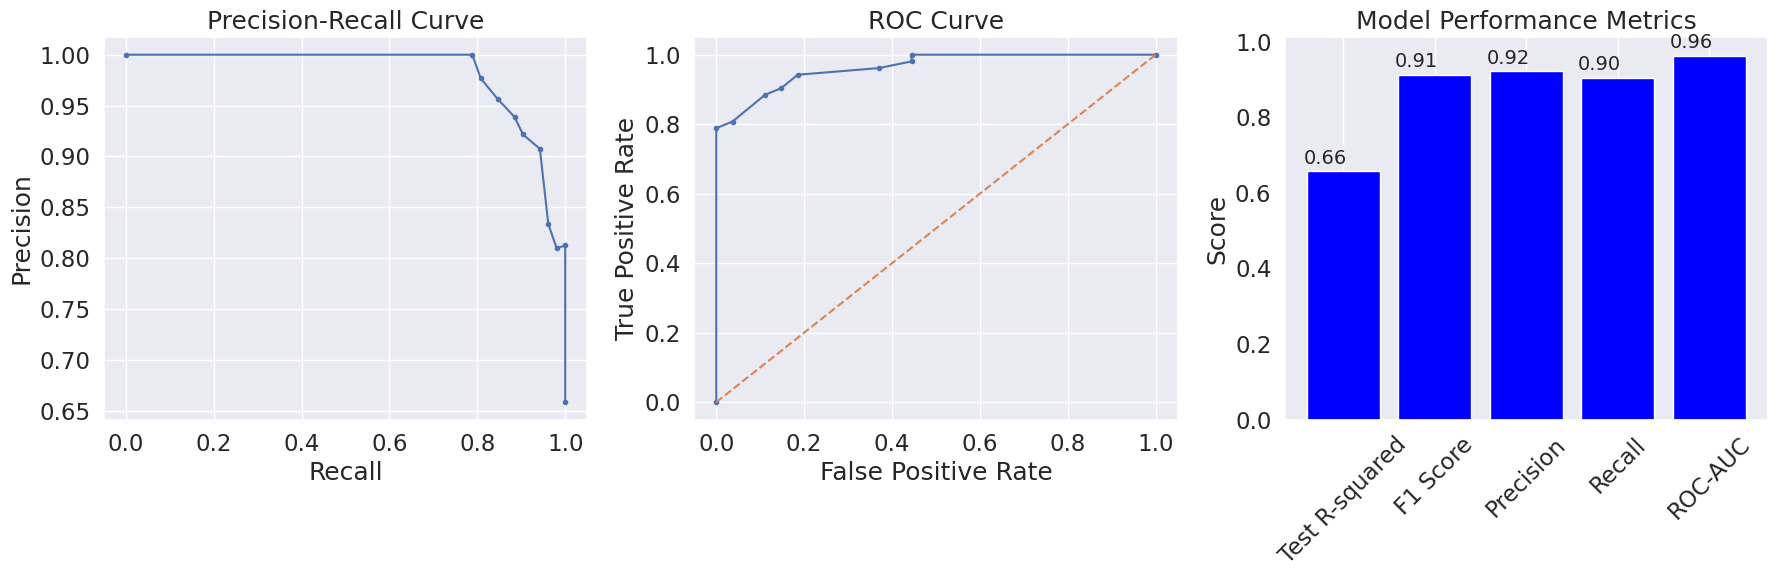

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve

# Calculate F1 score, precision, and recall
f1 = f1_score(Y_test, np.round(Y_test_pred))
precision = precision_score(Y_test, np.round(Y_test_pred))
recall = recall_score(Y_test, np.round(Y_test_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_test_pred)

# Plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_test_pred)

plt.figure(figsize=(18, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Plot Metrics
plt.subplot(1, 3, 3)
metrics = [test_r2, f1, precision, recall, roc_auc]
labels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
x = np.arange(len(metrics))
bars = plt.bar(x, metrics, color='blue')
plt.xticks(x, labels, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Attach numeric values to the bars
for bar, metric in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, '%.2f' % metric, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# <h1> Prediction from Maths dataset </h2>

## <h3> Importing datasets from CSV files and cleaning them </h3>

In [ ]:
# Remove rows with missing values
df_clean_data = df_data4.dropna(axis=0)
print(df_clean_data.shape)

(395, 33)


In [ ]:
# Remove duplicate rows
df_clean_data = df_clean_data.drop_duplicates()
print(df_clean_data.shape)

(395, 33)


In [ ]:
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## <h4><b> To convert object columns to numeric </b></h4>

In [ ]:
# Function to convert object columns to numeric
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping


In [ ]:
convert_object_to_numeric(df_clean_data)
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,0,1,1,1,2,1,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,1,1,3,2,3,1,...,4,4,1,3,4,5,0,11,12,10


## <h4><b> X contains all columns except G3 and Y contains G3 column elements </b></h4>

In [ ]:
X = df_clean_data.drop(columns=['G3'],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,4,6,10


In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,0,1,1,3,1,3,2,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,1,0,1,1,1,2,1,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,1,1,1,3,2,3,1,...,0,4,4,1,3,4,5,0,11,12


In [ ]:
Y = df_clean_data['G3']
print(Y)

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64


## <h4><b> Separating Dataset into Training and Test </b></h4>

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Training : 80% and Testing : 20%
X_train.shape, X_test.shape

((316, 32), (79, 32))

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
181,0,1,16,0,0,1,3,3,3,1,...,1,4,2,3,1,2,3,2,12,13
194,0,1,16,0,0,1,2,3,2,1,...,0,5,3,3,1,1,3,0,13,14
173,0,0,16,0,0,1,1,3,0,2,...,1,4,3,5,1,1,3,0,8,7
63,0,0,16,0,0,1,4,3,4,3,...,0,3,4,4,2,4,4,2,10,9
253,0,1,16,1,0,1,2,1,2,1,...,0,3,3,2,1,3,3,0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,15,0,0,1,4,2,2,1,...,0,3,3,3,1,1,3,0,10,10
106,0,0,15,0,0,1,2,2,2,1,...,0,5,1,2,1,1,3,8,7,8
270,0,0,19,0,0,1,3,3,2,2,...,0,4,3,5,3,3,5,15,9,9
348,0,0,17,0,0,1,4,3,1,1,...,1,4,4,3,1,3,4,0,13,15


## <h4><b> Applying Random Forest Classifier to perform feature extraction and visualize top features in the dataset </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features based on importance
#top_15_features = feature_importance_df['Feature'].head(15)
top_15_features = feature_importance_df['Feature'].head(15)


# Filter training and testing data to use only the top 15 features
X_test1 = X_test #Without top 15 fs
X_train1 = X_train #Without top 15 fs

X_train = X_train[top_15_features]
X_test = X_test[top_15_features]

In [ ]:
X_train

,G2,G1,absences,health,Mjob,Walc,age,reason,freetime,goout,Fedu,Fjob,Medu,famrel,studytime
181,13,12,2,3,3,2,16,2,2,3,3,1,3,4,2
194,14,13,0,3,2,1,16,2,3,3,3,1,2,5,1
173,7,8,0,3,0,1,16,2,3,5,3,2,1,4,2
63,9,10,2,4,4,4,16,2,4,4,3,3,4,3,3
253,9,8,0,3,2,3,16,0,3,2,1,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,10,10,0,3,2,1,15,0,3,3,2,1,4,3,4
106,8,7,8,3,2,1,15,0,1,2,2,1,2,5,4
270,9,9,15,5,2,3,19,2,3,5,3,2,3,4,2
348,15,13,0,4,1,3,17,3,4,3,3,1,4,4,3


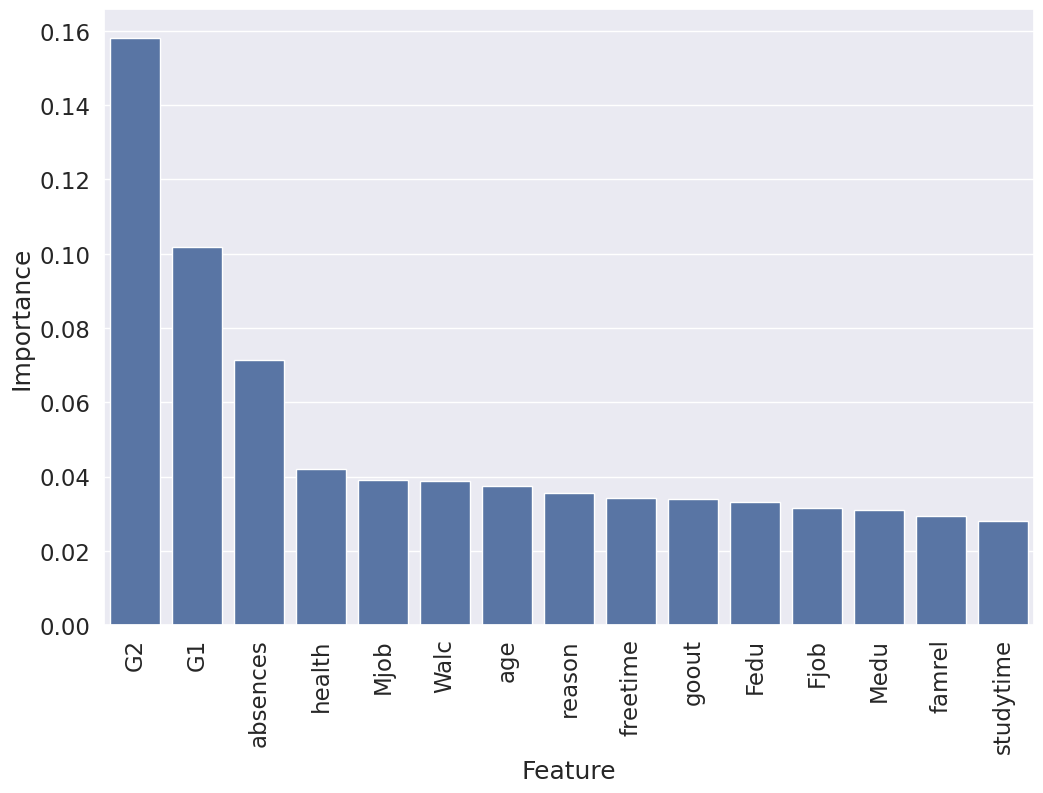

In [ ]:
# Set the style of the plot to have a white background
sns.set_style('white')

# Set global font size for the plot
sns.set(font_scale=1.5)  # Increase the font size of labels and title
plt.rcParams.update({'font.size': 14})  # Increase the font size of tick labels

# Plot a bar graph with feature names displayed vertically
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data = feature_importance_df.head(15))

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
#plt.title('Top 15 Features and their Importance Scores')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Save the plot with a white background at high resolution (DPI) and as an image file
#plt.savefig('top_15_features_importance.png', dpi=300, facecolor='white')

# Display the plot
plt.show()


In [ ]:
X_train.shape, X_test.shape

((316, 15), (79, 15))

## <h4><b> Model evaluation and comparison chart of each regressor </b></h4>

In [ ]:
# Function defn for model evaluation parameters
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
78,0,1,17,0,0,1,2,1,2,1,...,0,4,5,1,1,1,3,2,8,8
371,1,1,18,1,1,1,1,2,0,2,...,1,4,3,3,2,3,3,3,14,12
248,0,1,18,1,1,1,3,3,2,2,...,1,4,3,3,1,3,5,8,3,5
55,0,0,16,0,0,0,2,1,2,1,...,1,5,3,4,1,1,2,8,8,9
390,1,1,20,0,1,0,2,2,3,2,...,0,5,5,4,4,5,4,11,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,0,17,1,0,1,1,2,2,2,...,0,3,2,2,1,2,3,0,12,11
82,0,0,15,0,1,1,3,2,3,1,...,0,4,4,4,1,1,5,10,7,6
114,0,1,15,1,0,1,2,1,1,2,...,1,5,4,2,1,1,5,8,9,9
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,2,15,14


In [ ]:
#Comparing the performance of each of these models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.7104
- Mean Absolute Error: 1.1614
- R2 Score: 0.8607
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2970
- Mean Absolute Error: 1.5447
- R2 Score: 0.7427


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.9006
- Mean Absolute Error: 1.1007
- R2 Score: 0.8280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0424
- Mean Absolute Error: 1.2181
- R2 Score: 0.7966


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.7105
- Mean Absolute Error: 1.1598
- R2 Score: 0.8607
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2927
- Mean Absolute Error: 1.5388
- R2 Score: 0.7437


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.4809
- Mean Absolute Error: 1.0127
- R2 Score: 0.8956
-----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.825762
8,AdaBoost Regressor,0.821149
7,CatBoosting Regressor,0.809219
1,Lasso,0.796559
3,K-Neighbors Regressor,0.778653
6,XGBRegressor,0.753125
2,Ridge,0.743658
0,Linear Regression,0.742689
4,Decision Tree,0.695660


## <h4><b> Calculating Accuracy of our model </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest regressor on the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions
Y_pred = random_forest_model.predict(X_test)

# Calculate R2 score
score = r2_score(Y_test, Y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 82.74


## <h4><b> Scatter plot for actual vs predicted </b></h4>

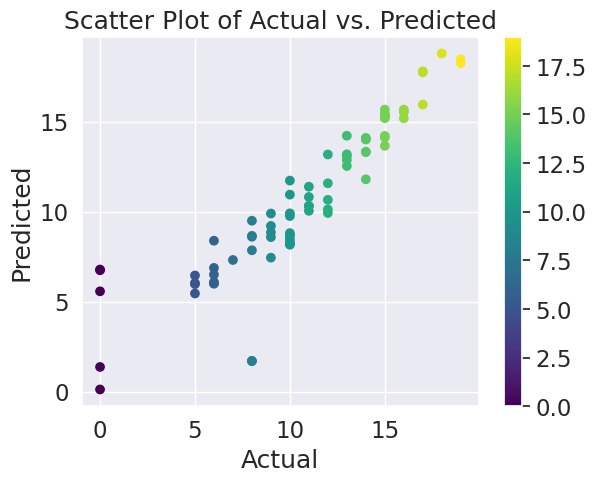

In [ ]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

## <h4> Saving our model as a pickle file </h4>

In [ ]:
"""
# Import necessary libraries
import pickle

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/SIT_Hackathon/Models/pred_mat_rfr_wofs.pkl'  # Adjust the path as needed

# Save the model to the specified file in Google Drive with write permission
try:
    with open(file_path, 'wb') as files:
        pickle.dump(random_forest_model, files)
    print("Model saved successfully in Google Drive!")
except Exception as e:
    print(f"Failed to save model: {e}")

# Load the saved model from the specified file in Google Drive
try:
    with open(file_path, 'rb') as f:
        lr = pickle.load(f)
    print("Model loaded successfully from Google Drive!")
except Exception as e:
    print(f"Failed to load model: {e}")
"""

Model saved successfully in Google Drive!
Model loaded successfully from Google Drive!


## Generating Bar graphs for with and without using feature selection

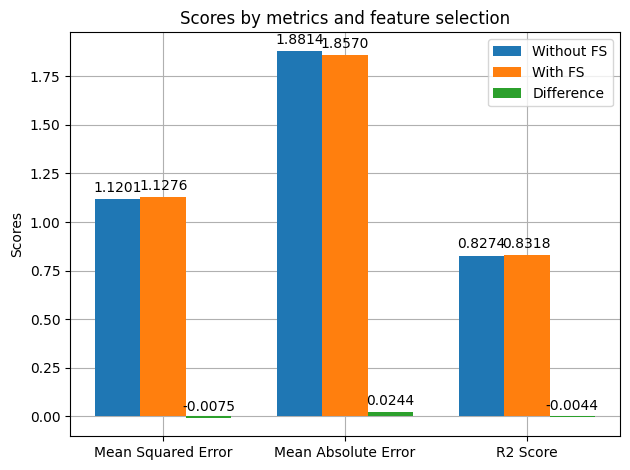

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the model with feature selection
model_with_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/pred_mat_rfr.pkl")

# Train the model without feature selection
model_without_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/pred_mat_rfr_wofs.pkl")

# Make predictions
Y_test_pred_with_fs = model_with_fs.predict(X_test)
Y_test_pred_without_fs = model_without_fs.predict(X_test1)

mse_with_fs, mae_with_fs, r2_with_fs = evaluate_model(Y_test, Y_test_pred_with_fs)
mse_without_fs, mae_without_fs, r2_without_fs = evaluate_model(Y_test, Y_test_pred_without_fs)

# Calculate the differences
diff_mse = mse_without_fs - mse_with_fs
diff_mae = mae_without_fs - mae_with_fs
diff_r2 = r2_without_fs - r2_with_fs

# Bar graph
labels = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']
without_fs = [mse_without_fs, mae_without_fs, r2_without_fs]
with_fs = [mse_with_fs, mae_with_fs, r2_with_fs]
diff = [diff_mse, diff_mae, diff_r2]

x = range(len(labels))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, without_fs, width, label='Without FS', zorder=3)
bars2 = ax.bar([i + width for i in x], with_fs, width, label='With FS', zorder=3)
bars3 = ax.bar([i + width*2 for i in x], diff, width, label='Difference', zorder=3)

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and feature selection')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


## Generating results : f1 score , recall , precision , ROC - AUC

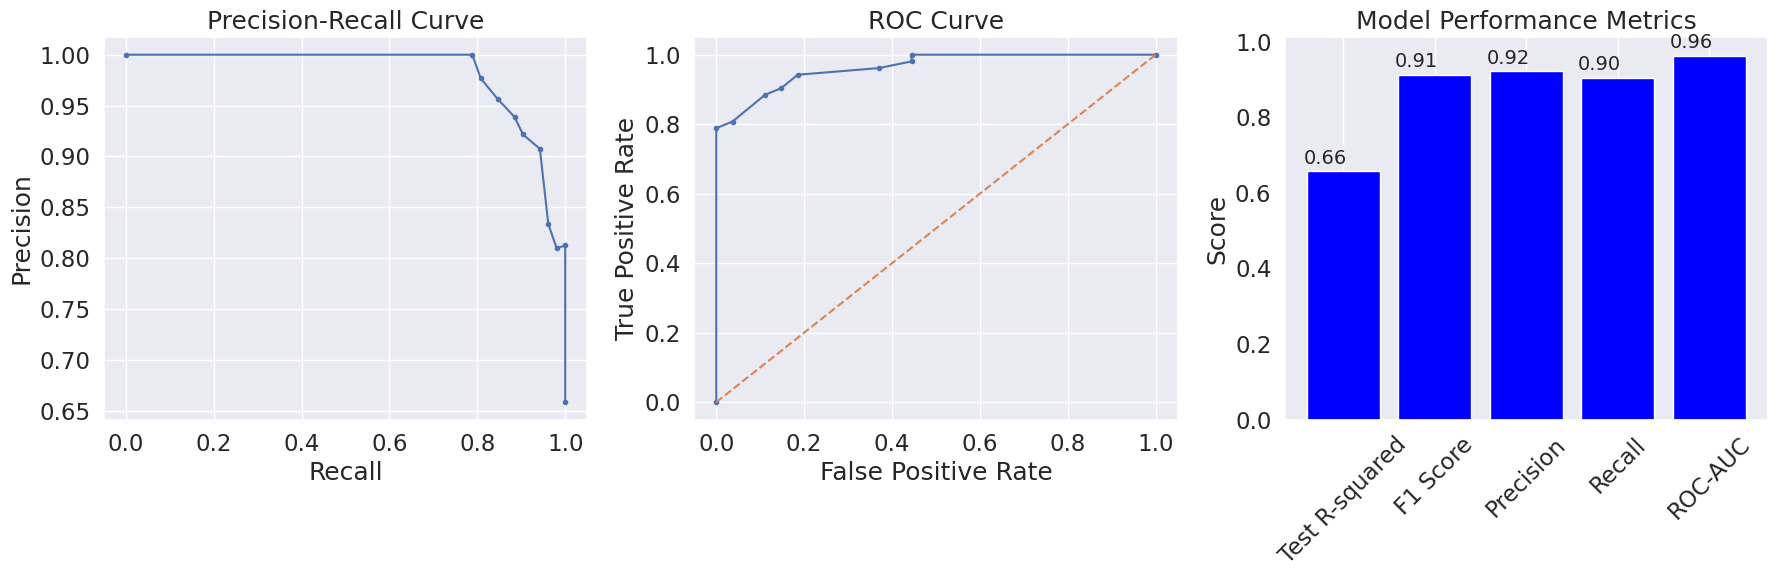

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve

# Calculate F1 score, precision, and recall
f1 = f1_score(Y_test, np.round(Y_test_pred))
precision = precision_score(Y_test, np.round(Y_test_pred))
recall = recall_score(Y_test, np.round(Y_test_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_test_pred)

# Plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_test_pred)

plt.figure(figsize=(18, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Plot Metrics
plt.subplot(1, 3, 3)
metrics = [test_r2, f1, precision, recall, roc_auc]
labels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
x = np.arange(len(metrics))
bars = plt.bar(x, metrics, color='blue')
plt.xticks(x, labels, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Attach numeric values to the bars
for bar, metric in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, '%.2f' % metric, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# <h1> Prediction from Portuguese dataset </h2>

## <h3> Importing datasets from CSV files and cleaning them </h3>

In [ ]:
# Remove rows with missing values
df_clean_data = df_data5.dropna(axis=0)
print(df_clean_data.shape)

(649, 33)


In [ ]:
# Remove duplicate rows
df_clean_data = df_clean_data.drop_duplicates()
print(df_clean_data.shape)

(649, 33)


In [ ]:
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## <h4><b> To convert object columns to numeric </b></h4>

In [ ]:
# Function to convert object columns to numeric
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping


In [ ]:
convert_object_to_numeric(df_clean_data)
df_clean_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,1,1,3,1,4,2,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,0,1,1,1,2,1,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,6,10,10,10


## <h4><b> X contains all columns except G3 and Y contains G3 column elements </b></h4>

In [ ]:
X = df_clean_data.drop(columns=['G3'],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,0,11,13


In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,1,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,1,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,1,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,0,5,4,2,1,2,5,4,10,11
645,1,0,18,0,1,1,3,1,4,2,...,0,4,3,4,1,1,1,4,15,15
646,1,0,18,0,0,1,1,1,2,1,...,0,1,1,1,1,1,5,6,11,12
647,1,1,17,0,1,1,3,1,3,2,...,0,2,4,5,3,4,2,6,10,10


In [ ]:
Y = df_clean_data['G3']
print(Y)

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64


## <h4><b> Separating Dataset into Training and Test </b></h4>

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Training : 80% and Testing : 20%
X_train.shape, X_test.shape

((519, 32), (130, 32))

In [ ]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
332,0,0,18,0,0,1,2,2,0,4,...,0,4,3,3,1,2,2,0,18,18
29,0,1,16,0,0,1,4,4,4,0,...,1,4,4,5,5,5,5,4,12,11
302,0,1,18,1,0,1,3,2,2,1,...,0,5,3,2,1,1,3,2,10,11
286,0,1,17,1,0,1,2,1,2,1,...,0,4,4,2,2,4,5,0,12,12
554,1,0,17,1,0,1,1,1,0,4,...,1,3,5,5,2,2,4,3,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,15,0,0,1,4,2,2,1,...,0,3,3,3,1,1,3,0,11,9
106,0,0,15,0,0,1,2,2,2,1,...,0,5,1,2,1,1,3,4,10,10
270,0,1,16,0,0,1,4,4,3,2,...,0,5,3,2,1,2,5,4,14,15
435,1,0,15,1,1,1,1,1,0,2,...,0,5,4,3,1,2,4,0,10,10


## <h4><b> Applying Random Forest Classifier to perform feature extraction and visualize top features in the dataset </b></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features based on importance
#top_15_features = feature_importance_df['Feature'].head(15)
top_15_features = feature_importance_df['Feature'].head(15)

# Filter training and testing data to use only the top 15 features
X_test1 = X_test #Without top 15 fs
X_train1 = X_train #Without top 15 fs

X_train = X_train[top_15_features]
X_test = X_test[top_15_features]

In [ ]:
X_train

,G2,G1,absences,age,goout,freetime,health,Fedu,Walc,famrel,Mjob,Medu,reason,studytime,Fjob
332,18,18,0,18,3,3,2,2,2,4,0,2,1,3,4
29,11,12,4,16,5,4,5,4,5,4,4,4,2,2,0
302,11,10,2,18,2,3,3,2,1,5,2,3,0,3,1
286,12,12,0,17,2,4,5,1,4,4,2,2,0,1,1
554,11,10,3,17,5,5,4,1,2,3,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9,11,0,15,3,3,3,2,1,3,2,4,0,4,1
106,10,10,4,15,2,1,3,2,1,5,2,2,0,4,1
270,15,14,4,16,2,3,5,4,2,5,3,4,0,1,2
435,10,10,0,15,3,4,4,1,2,5,0,1,3,2,2


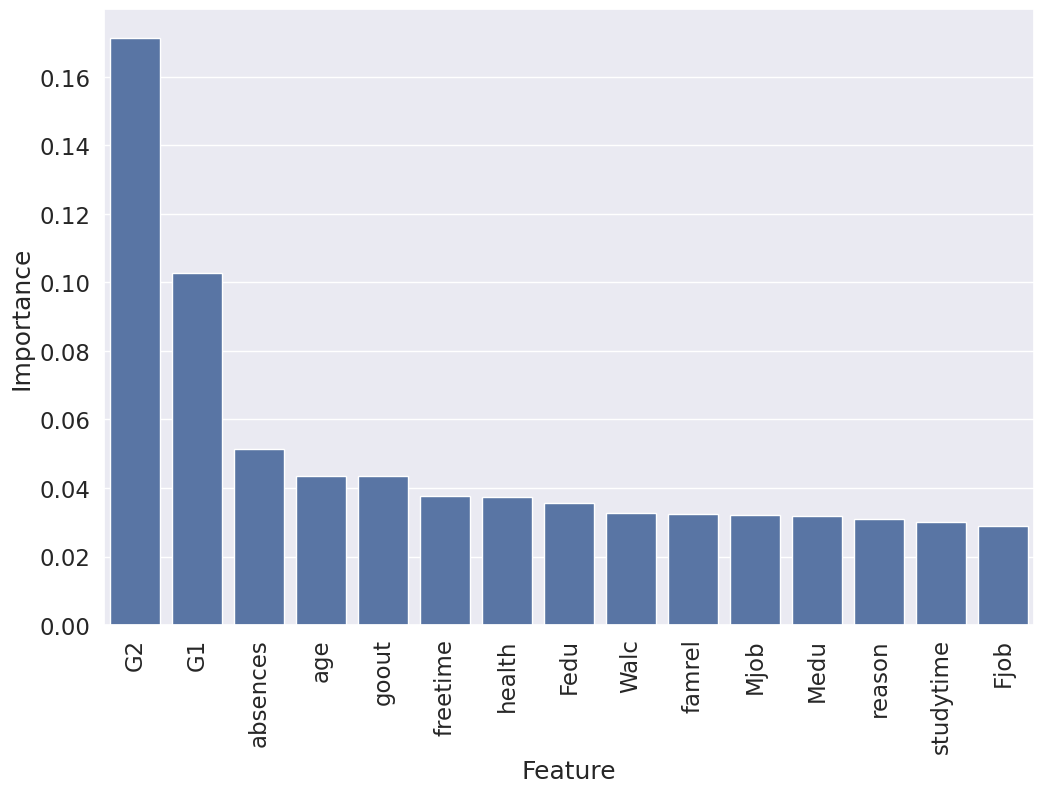

In [ ]:
# Set the style of the plot to have a white background
sns.set_style('white')

# Set global font size for the plot
sns.set(font_scale=1.5)  # Increase the font size of labels and title
plt.rcParams.update({'font.size': 14})  # Increase the font size of tick labels

# Plot a bar graph with feature names displayed vertically
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data = feature_importance_df.head(15))

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
#plt.title('Top 15 Features and their Importance Scores')

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Save the plot with a white background at high resolution (DPI) and as an image file
#plt.savefig('top_15_features_importance.png', dpi=300, facecolor='white')

# Display the plot
plt.show()


In [ ]:
X_train.shape, X_test.shape

((519, 15), (130, 15))

## <h4><b> Model evaluation and comparison chart of each regressor </b></h4>

In [ ]:
# Function defn for model evaluation parameters
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
X_test

,G2,G1,absences,age,goout,freetime,health,Fedu,Walc,famrel,Mjob,Medu,reason,studytime,Fjob
636,18,17,4,18,4,2,2,4,4,3,4,4,2,2,0
220,11,11,2,16,3,3,4,1,2,2,3,3,0,2,1
594,18,18,0,18,5,3,1,4,2,4,4,4,3,2,0
429,11,10,5,16,2,3,2,4,3,5,0,4,2,2,1
72,11,13,2,15,4,3,5,1,4,3,2,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,6,7,2,16,3,1,3,2,4,3,3,3,0,1,4
374,18,17,0,17,3,4,5,1,3,3,3,3,0,3,2
444,10,9,4,16,5,4,5,4,2,3,2,3,1,2,3
244,12,14,0,17,3,2,3,3,2,3,1,4,3,2,1


In [ ]:
#Comparing the performance of each of these models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.2660
- Mean Absolute Error: 0.7989
- R2 Score: 0.8477
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1873
- Mean Absolute Error: 0.7323
- R2 Score: 0.8554


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.3385
- Mean Absolute Error: 0.8051
- R2 Score: 0.8298
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1347
- Mean Absolute Error: 0.6787
- R2 Score: 0.8680


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.2660
- Mean Absolute Error: 0.7989
- R2 Score: 0.8477
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1872
- Mean Absolute Error: 0.7322
- R2 Score: 0.8555


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.1901
- Mean Absolute Error: 0.7927
- R2 Score: 0.8654
-----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.867974
2,Ridge,0.855476
0,Linear Regression,0.855446
5,Random Forest Regressor,0.808195
7,CatBoosting Regressor,0.805685
6,XGBRegressor,0.756791
8,AdaBoost Regressor,0.754625
3,K-Neighbors Regressor,0.753038
4,Decision Tree,0.472282


## <h4><b> Calculating Accuracy of our model </b></h4>

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Initialize the Lasso Regressor
lasso_model = Lasso()

# Train the Lasso regressor on the training data
lasso_model.fit(X_train, Y_train)

# Make predictions
Y_pred = lasso_model.predict(X_test)

# Calculate R2 score
score = r2_score(Y_test, Y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 86.80


## <h4><b> Scatter plot for actual vs predicted </b></h4>

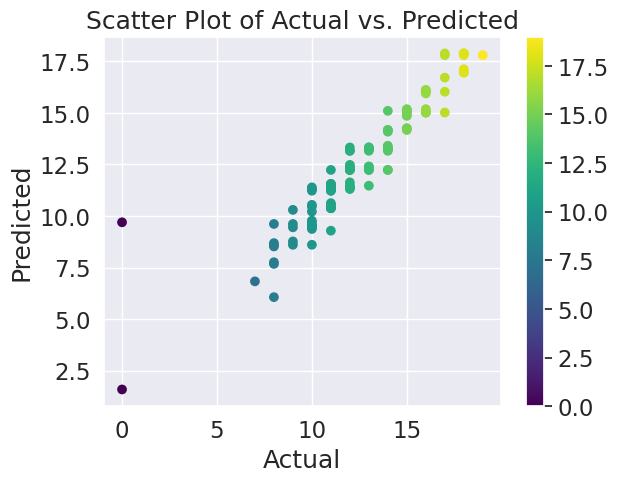

In [ ]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

## <h4> Saving our model as a pickle file </h4>

In [ ]:
"""
# Import necessary libraries
import pickle

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/SIT_Hackathon/Models/pred_Por_lasso_wofs.pkl'  # Adjust the path as needed

# Save the model to the specified file in Google Drive with write permission
try:
    with open(file_path, 'wb') as files:
        pickle.dump(lasso_model, files)
    print("Model saved successfully in Google Drive!")
except Exception as e:
    print(f"Failed to save model: {e}")

# Load the saved model from the specified file in Google Drive
try:
    with open(file_path, 'rb') as f:
        lr = pickle.load(f)
    print("Model loaded successfully from Google Drive!")
except Exception as e:
    print(f"Failed to load model: {e}")
"""

Model saved successfully in Google Drive!
Model loaded successfully from Google Drive!


## Generating Bar graphs for with and without using feature selection

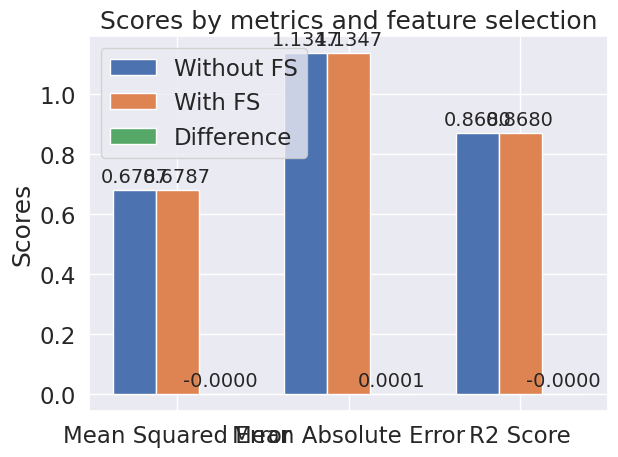

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the model with feature selection
model_with_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/pred_Por_lasso.pkl")

# Train the model without feature selection
model_without_fs = joblib.load("/content/drive/My Drive/SIT_Hackathon/Models/pred_Por_lasso_wofs.pkl")

# Make predictions
Y_test_pred_with_fs = model_with_fs.predict(X_test)
Y_test_pred_without_fs = model_without_fs.predict(X_test1)

mse_with_fs, mae_with_fs, r2_with_fs = evaluate_model(Y_test, Y_test_pred_with_fs)
mse_without_fs, mae_without_fs, r2_without_fs = evaluate_model(Y_test, Y_test_pred_without_fs)

# Calculate the differences
diff_mse = mse_without_fs - mse_with_fs
diff_mae = mae_without_fs - mae_with_fs
diff_r2 = r2_without_fs - r2_with_fs

# Bar graph
labels = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']
without_fs = [mse_without_fs, mae_without_fs, r2_without_fs]
with_fs = [mse_with_fs, mae_with_fs, r2_with_fs]
diff = [diff_mse, diff_mae, diff_r2]

x = range(len(labels))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, without_fs, width, label='Without FS', zorder=3)
bars2 = ax.bar([i + width for i in x], with_fs, width, label='With FS', zorder=3)
bars3 = ax.bar([i + width*2 for i in x], diff, width, label='Difference', zorder=3)

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and feature selection')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', zorder=5)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.grid(zorder=0)
plt.tight_layout()
plt.show()


## Generating results : f1 score , recall , precision , ROC - AUC

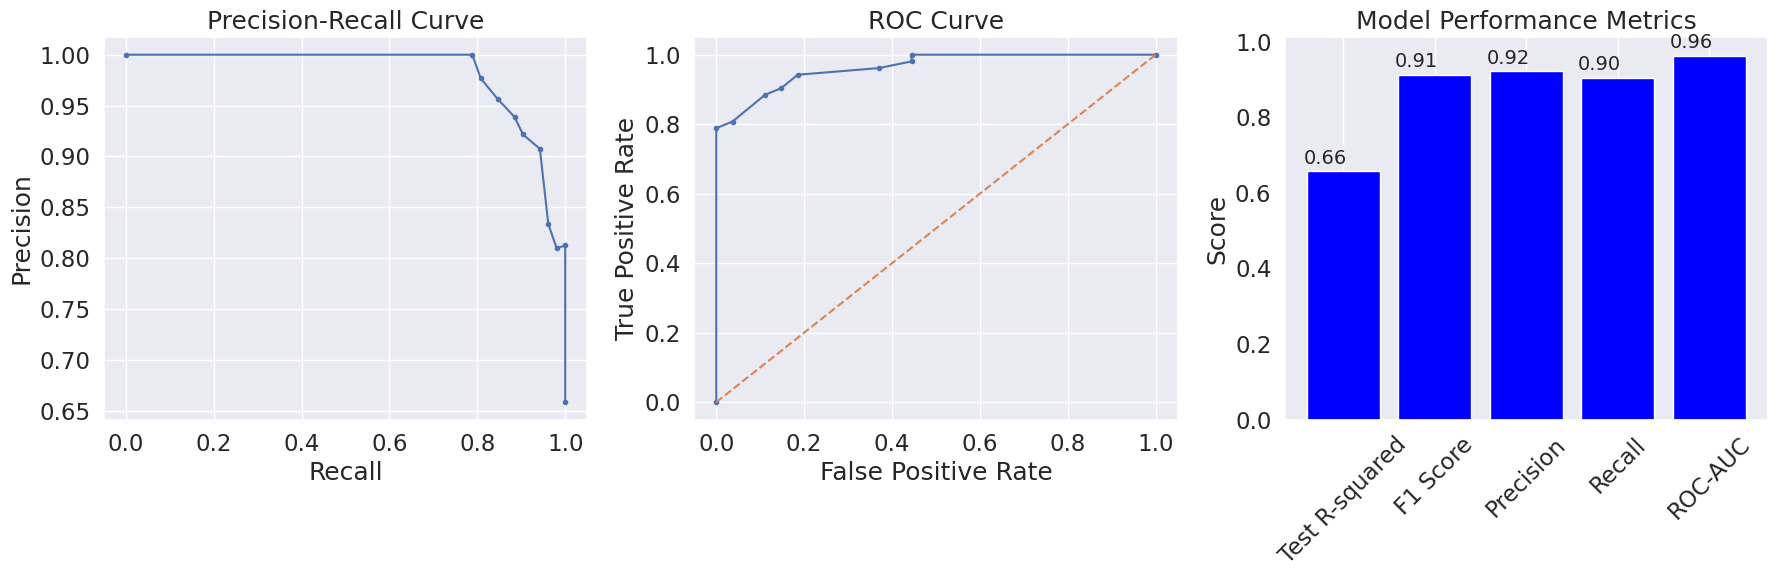

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve

# Calculate F1 score, precision, and recall
f1 = f1_score(Y_test, np.round(Y_test_pred))
precision = precision_score(Y_test, np.round(Y_test_pred))
recall = recall_score(Y_test, np.round(Y_test_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_test_pred)

# Plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_test_pred)

plt.figure(figsize=(18, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Plot Metrics
plt.subplot(1, 3, 3)
metrics = [test_r2, f1, precision, recall, roc_auc]
labels = ['Test R-squared', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
x = np.arange(len(metrics))
bars = plt.bar(x, metrics, color='blue')
plt.xticks(x, labels, rotation=45)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Attach numeric values to the bars
for bar, metric in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 0.01, '%.2f' % metric, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# <h3> Saving the model using Pickle and file name : model_pkl. (prev)

In [ ]:
"""
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

# load saved model
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
"""

In [ ]:
import pickle
import joblib
import pandas as pd
import numpy as np

model1 = joblib.load('/content/drive/My Drive/SIT_Hackathon/Models/Binary_Maths_adaboost.pkl')
#input_data_type = type(model1)
#print("Input data type:", input_data_type)
Y2 = X_test.iloc[2]
Y3 = np.reshape(Y2, (1, -1))
print(Y3)
# Initialize an empty 2D NumPy array

arr = np.array([[12 ,14,  3, 18,  3,  3,  2,  3,  3,  1,  0,  2,  1,  1,  4]])

print("The result is : ")
predict1 = model1.predict(arr)
if(predict1==1):
   print("Student has passed")
else:
   print("Student has failed")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/SIT_Hackathon/Models/Binary_Maths_adaboost.pkl'

In [ ]:
def convert_object_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column contains object (string) values
            unique_values = df[column].unique()  # Get unique values in the column
            mapping = {value: index for index, value in enumerate(unique_values)}  # Create a mapping of unique values to numeric values
            df[column] = df[column].map(mapping)  # Replace object values with numeric values based on the mapping
#Y = X_test.iloc[1]
#Y1 = np.reshape(Y, (1, -1))
#print(Y1)

# initialize list of lists
#data25 = [['GP',	'F',	18,	'U',	'GT3',	'A',	4,	4,	'at_home',	'teacher',	'course',	'mother',	2,	2,	0,	'yes'	,'no',	'no'	,'no',	'yes',	'yes',	'no',	'no',	4,	3,	4,	1,	1,	3,	6,	5,	6]]
# Create the pandas DataFrame
#df = pd.DataFrame(data25, columns=['school',	'sex',	'age',	'address',	'famsize',	'Pstatus',	'Medu',	'Fedu',	'Mjob',	'Fjob',	'reason',	'guardian',	'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel',	'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences',	'G1',	'G2'])
#print(df)
#df = convert_object_to_numeric(df)
#Y2 = np.reshape(df, (1, -1))